# Useful librairies

In [73]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from datetime import date, timedelta

matplotlib.rcParams["figure.facecolor"] = "white"
pd.set_option("display.max_columns", None)


# EDA

## Data Overview

In [74]:
# create a dataframe from the csv file Time_Value_CM.csv
df = pd.read_csv("../power_data/Time_Value_CM.csv", names=["Date", "Value"])
df.head()

,Date,Value
0,2022-05-02T00:01:00Z,178961.742
1,2022-05-02T00:02:00Z,170609.878
2,2022-05-02T00:03:00Z,168829.864
3,2022-05-02T00:04:00Z,173252.734
4,2022-05-02T00:05:00Z,177271.117


In [75]:
# convert the date column to datetime format
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%dT%H:%M:%SZ")
df.sort_values(by="Date", inplace=True)

In [76]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["Day_of_week"] = df["Date"].dt.dayofweek.astype(int)
df["Hour"] = df["Date"].dt.hour
df["Minute"] = df["Date"].dt.minute
df["Second"] = df["Date"].dt.second

In [77]:
df.head()

,Date,Value,Year,Month,Day,Day_of_week,Hour,Minute,Second
79143,2022-02-18 15:39:00,212141.645,2022,2,18,4,15,39,0
79144,2022-02-18 15:40:00,216980.618,2022,2,18,4,15,40,0
79145,2022-02-18 15:41:00,219702.692,2022,2,18,4,15,41,0
79146,2022-02-18 15:42:00,218002.962,2022,2,18,4,15,42,0
79147,2022-02-18 15:43:00,219366.764,2022,2,18,4,15,43,0


In [78]:
# drop second
df.drop(["Second"], axis=1, inplace=True)

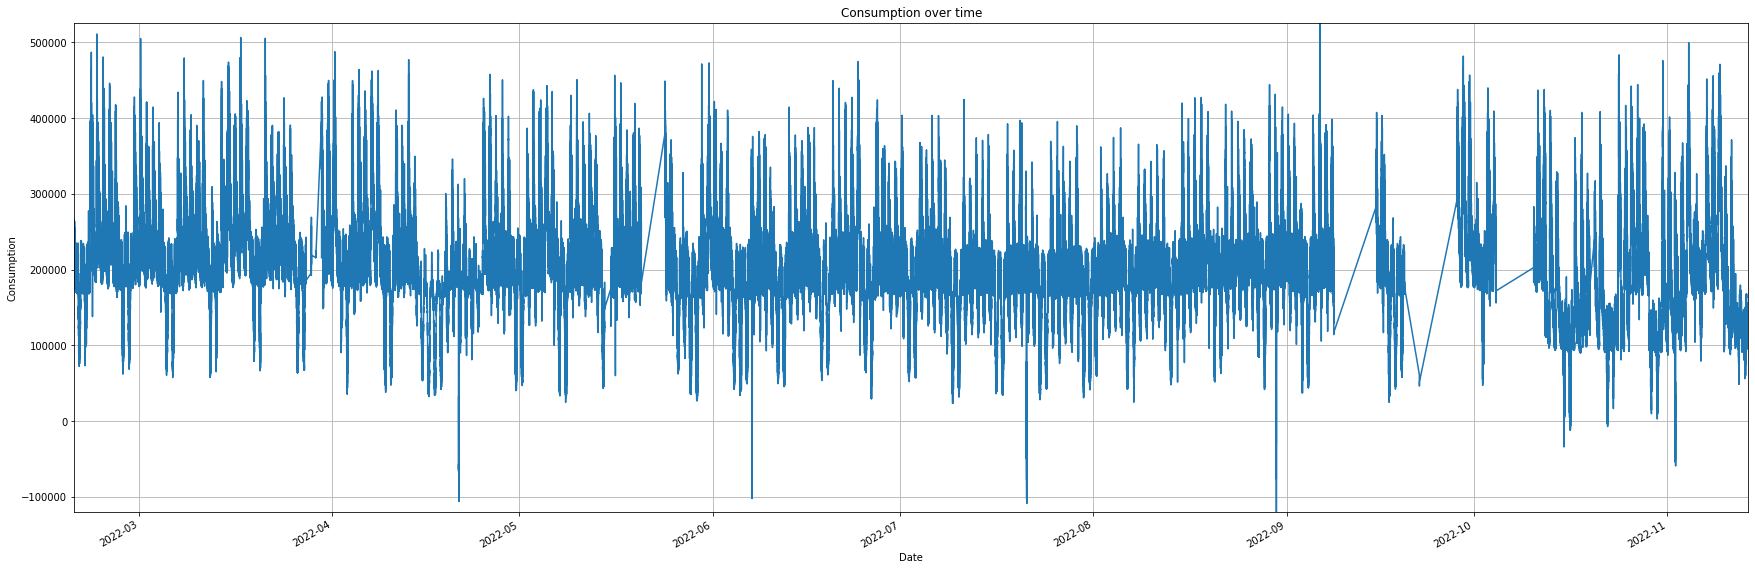

In [79]:
def plot_consumption_over_time_detailed_graph():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df["Date"], df["Value"])
    ax.set_title("Consumption over time")
    ax.set_xlabel("Date")
    ax.set_ylabel("Consumption")
    ax.set_xlim(df["Date"].min(), df["Date"].max())
    ax.set_ylim(df["Value"].min(), df["Value"].max())
    ax.grid(True)
    fig.autofmt_xdate()
    plt.show()

plot_consumption_over_time_detailed_graph()


## Replacing missing data

### Days Missing

In [80]:
sdate = date(2022, 2, 19)
edate = date(2022, 11, 13)
all_days = pd.date_range(sdate, edate - timedelta(days=1), freq="d")
all_days = pd.to_datetime(all_days, format="%Y-%m-%d")

In [81]:
days_missing = []
for x in all_days:
    month_x = x.month
    day_x = x.day
    if df.loc[(df.Month == month_x) & (df.Day == day_x)].shape[0] == 0:
        days_missing.append(x)

In [82]:
missing_perc = round((len(days_missing) * 100) / len(all_days), 2)
print("We have ", missing_perc, "% of complete days missing values.")

We have  7.87 % of complete days missing values.


In [83]:
for miss_day in days_missing:
    prev_week = miss_day - dt.timedelta(days=7)
    next_week = miss_day + dt.timedelta(days=7)
    prev_2_week = miss_day - dt.timedelta(days=14)
    next_2_week = miss_day + dt.timedelta(days=14)
    if df.loc[(df.Month == prev_week.month) & (df.Day == prev_week.day)].shape[0] != 0:
        df_concat = df.loc[(df.Month == prev_week.month) & (df.Day == prev_week.day)]
        df_concat["Date"] = df_concat["Date"] + dt.timedelta(days=7)
        df = pd.concat([df, df_concat], ignore_index=True)
    else:
        if (
            df.loc[(df.Month == next_week.month) & (df.Day == next_week.day)].shape[0]
            != 0
        ):
            df_concat = df.loc[
                (df.Month == next_week.month) & (df.Day == next_week.day)
            ]
            df_concat["Date"] = df_concat["Date"] - dt.timedelta(days=7)
            df = pd.concat([df, df_concat], ignore_index=True)
        else:
            if (
                df.loc[
                    (df.Month == prev_2_week.month) & (df.Day == prev_2_week.day)
                ].shape[0]
                != 0
            ):
                df_concat = df.loc[
                    (df.Month == prev_2_week.month) & (df.Day == prev_2_week.day)
                ]
                df_concat["Date"] = df_concat["Date"] + dt.timedelta(days=14)
                df = pd.concat([df, df_concat], ignore_index=True)
            else:
                if (
                    df.loc[
                        (df.Month == next_2_week.month) & (df.Day == next_2_week.day)
                    ].shape[0]
                    != 0
                ):
                    df_concat = df.loc[
                        (df.Month == next_2_week.month) & (df.Day == next_2_week.day)
                    ]
                    df_concat["Date"] = df_concat["Date"] - dt.timedelta(days=14)
                    df = pd.concat([df, df_concat], ignore_index=True)

C:\Users\User\AppData\Local\Temp\ipykernel_22192\2076673288.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat["Date"] = df_concat["Date"] + dt.timedelta(days=7)
C:\Users\User\AppData\Local\Temp\ipykernel_22192\2076673288.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat["Date"] = df_concat["Date"] + dt.timedelta(days=14)
C:\Users\User\AppData\Local\Temp\ipykernel_22192\2076673288.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [84]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["Day_of_week"] = df["Date"].dt.dayofweek.astype(int)
df["Hour"] = df["Date"].dt.hour
df["Minute"] = df["Date"].dt.minute
df["Second"] = df["Date"].dt.second

In [85]:
days_missing = []
for x in all_days:
    month_x = x.month
    day_x = x.day
    if df.loc[(df.Month == month_x) & (df.Day == day_x)].shape[0] == 0:
        days_missing.append(x)

In [86]:
missing_perc = round((len(days_missing) * 100) / len(all_days), 2)
print("We now have", missing_perc, "% of complete days missing values.")

We now have 0.0 % of complete days missing values.


In [87]:
# sort
df.sort_values(by="Date", inplace=True)

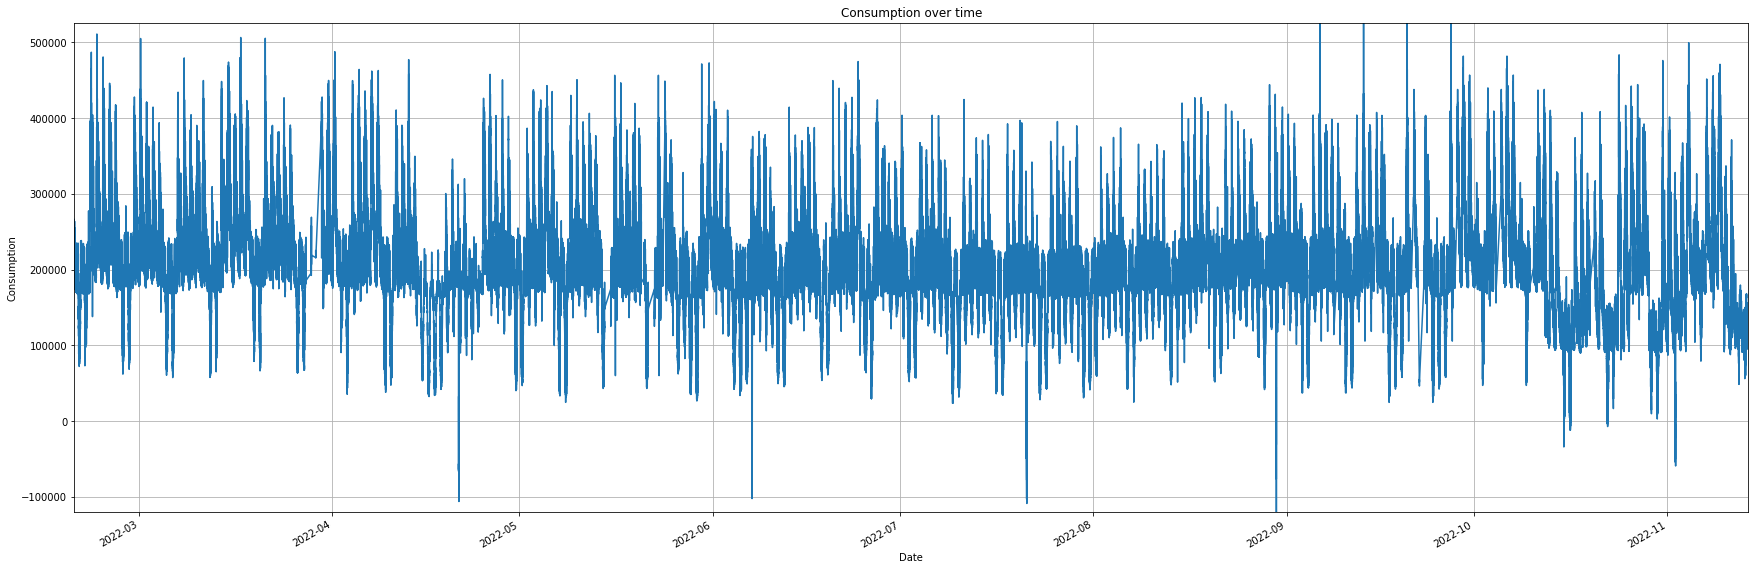

In [88]:
def plot_consumption_over_time_detailed_graph():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df["Date"], df["Value"])
    ax.set_title("Consumption over time")
    ax.set_xlabel("Date")
    ax.set_ylabel("Consumption")
    ax.set_xlim(df["Date"].min(), df["Date"].max())
    ax.set_ylim(df["Value"].min(), df["Value"].max())
    ax.grid(True)
    fig.autofmt_xdate()
    plt.show()

plot_consumption_over_time_detailed_graph()

### Hours Missing

In [89]:
hours = range(0, 23)

In [90]:
hours_missing = []
for x in all_days:
    month_x = x.month
    day_x = x.day
    for hour in hours:
        if (
            df.loc[(df.Month == month_x) & (df.Day == day_x) & (df.Hour == hour)].shape[
                0
            ]
            == 0
        ):
            hours_missing.append([x, hour])

In [91]:
missing_perc = round((len(hours_missing) * 100) / (len(all_days) * 24), 2)
print("We have", missing_perc, "% of complete hours missing values.")

We have 3.36 % of complete hours missing values.


In [92]:
for miss_value in hours_missing:
    prev_hour = (
        miss_value[0] + dt.timedelta(hours=miss_value[1]) + dt.timedelta(hours=-1)
    )
    next_hour = (
        miss_value[0] + dt.timedelta(hours=miss_value[1]) + dt.timedelta(hours=1)
    )
    prev2_hours = (
        miss_value[0] + dt.timedelta(hours=miss_value[1]) + dt.timedelta(hours=-2)
    )
    next2_hours = (
        miss_value[0] + dt.timedelta(hours=miss_value[1]) + dt.timedelta(hours=2)
    )
    if (
        df.loc[
            (df.Month == prev_hour.month)
            & (df.Day == prev_hour.day)
            & (df.Hour == prev_hour.hour)
        ].shape[0]
        != 0
    ):
        df_concat = df.loc[
            (df.Month == prev_hour.month)
            & (df.Day == prev_hour.day)
            & (df.Hour == prev_hour.hour)
        ]
        df_concat["Date"] = df_concat["Date"] + dt.timedelta(hours=1)
        df = pd.concat([df, df_concat], ignore_index=True)
    else:
        if (
            df.loc[
                (df.Month == next_hour.month)
                & (df.Day == next_hour.day)
                & (df.Hour == next_hour.hour)
            ].shape[0]
            != 0
        ):
            df_concat = df.loc[
                (df.Month == next_hour.month)
                & (df.Day == next_hour.day)
                & (df.Hour == next_hour.hour)
            ]
            df_concat["Date"] = df_concat["Date"] - dt.timedelta(hours=1)
            df = pd.concat([df, df_concat], ignore_index=True)
        else:
            if (
                df.loc[
                    (df.Month == prev2_hours.month)
                    & (df.Day == prev2_hours.day)
                    & (df.Hour == prev2_hours.hour)
                ].shape[0]
                != 0
            ):
                df_concat = df.loc[
                    (df.Month == prev2_hours.month)
                    & (df.Day == prev2_hours.day)
                    & (df.Hour == prev2_hours.hour)
                ]
                df_concat["Date"] = df_concat["Date"] + dt.timedelta(hours=2)
                df = pd.concat([df, df_concat], ignore_index=True)
            else:
                if (
                    df.loc[
                        (df.Month == next2_hours.month)
                        & (df.Day == next2_hours.day)
                        & (df.Hour == next2_hours.hour)
                    ].shape[0]
                    != 0
                ):
                    df_concat = df.loc[
                        (df.Month == next2_hours.month)
                        & (df.Day == next2_hours.day)
                        & (df.Hour == next2_hours.hour)
                    ]
                    df_concat["Date"] = df_concat["Date"] - dt.timedelta(hours=2)
                    df = pd.concat([df, df_concat], ignore_index=True)

C:\Users\User\AppData\Local\Temp\ipykernel_22192\2228839208.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat["Date"] = df_concat["Date"] + dt.timedelta(hours=1)
C:\Users\User\AppData\Local\Temp\ipykernel_22192\2228839208.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat["Date"] = df_concat["Date"] + dt.timedelta(hours=2)
C:\Users\User\AppData\Local\Temp\ipykernel_22192\2228839208.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [93]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["Day_of_week"] = df["Date"].dt.dayofweek.astype(int)
df["Hour"] = df["Date"].dt.hour
df["Minute"] = df["Date"].dt.minute
df["Second"] = df["Date"].dt.second

In [94]:
hours_missing = []
for x in all_days:
    month_x = x.month
    day_x = x.day
    for hour in hours:
        if (
            df.loc[(df.Month == month_x) & (df.Day == day_x) & (df.Hour == hour)].shape[
                0
            ]
            == 0
        ):
            hours_missing.append([x, hour])

In [95]:
missing_perc = round((len(hours_missing) * 100) / (len(all_days) * 24), 2)
print("We now have", missing_perc, "% of complete hours missing values.")

We now have 1.89 % of complete hours missing values.


In [96]:
df.sort_values(by="Date", inplace=True)

## Adding Irradiance Data

In [97]:
df_irr = pd.read_csv("../meteo_data/radiation_data.csv", sep=";")
df_irr = df_irr.drop(df_irr.columns[0], axis=1)
df_irr["Date"] = pd.to_datetime(df_irr["Date"], format="%Y%m%d%H%M")
df_irr.head()

,Date,Irradiance
0,2022-01-01 00:00:00,0
1,2022-01-01 00:10:00,0
2,2022-01-01 00:20:00,0
3,2022-01-01 00:30:00,0
4,2022-01-01 00:40:00,0


In [98]:
df_nan = df_irr[df_irr["Irradiance"] == "-"]
df_nan = df_nan.replace("-", np.nan)
df_nan_index = df_nan.index.tolist()
# replace these specific indexes in the original df by nan values
df_irr.loc[df_nan_index, "Irradiance"] = np.nan

In [99]:
df_irr.head()

# add between each data the missing values for the minute
df_irr = df_irr.set_index("Date")
df_irr = df_irr.resample("1min").asfreq()
df_irr = df_irr.reset_index()

# convert Irradiance to float
df_irr["Irradiance"] = df_irr["Irradiance"].str.replace(",", ".").astype(float)
df_irr.head()

,Date,Irradiance
0,2022-01-01 00:00:00,0.0
1,2022-01-01 00:01:00,NaN
2,2022-01-01 00:02:00,NaN
3,2022-01-01 00:03:00,NaN
4,2022-01-01 00:04:00,NaN


In [100]:
# for the nan values we will use the first value before the nan value that is not nan
df_irr["Irradiance"] = df_irr["Irradiance"].fillna(method="ffill")

In [101]:
df_irr = df_irr[
    (df_irr["Date"] >= df["Date"].min()) & (df_irr["Date"] <= df["Date"].max())
]

In [102]:
df = pd.merge(df, df_irr, on="Date")

In [103]:
df.head()

,Date,Value,Year,Month,Day,Day_of_week,Hour,Minute,Second,Irradiance
0,2022-02-18 15:39:00,212141.645,2022,2,18,4,15,39,0,134.0
1,2022-02-18 15:40:00,216980.618,2022,2,18,4,15,40,0,134.0
2,2022-02-18 15:41:00,219702.692,2022,2,18,4,15,41,0,134.0
3,2022-02-18 15:42:00,218002.962,2022,2,18,4,15,42,0,134.0
4,2022-02-18 15:43:00,219366.764,2022,2,18,4,15,43,0,134.0


## Add Temperature Data

In [104]:
df_temp = pd.read_csv(
    "../meteo_data/temperature_data.csv", sep=";", names=["Station", "Date", "Temperature"]
)

In [105]:
df_temp = df_temp.drop(df.index[0])
df_temp = df_temp.drop(["Station"], axis=1)
df_temp["Date"] = pd.to_datetime(df_temp["Date"], format="%Y%m%d%H%M")
df_temp.head()

,Date,Temperature
1,2022-01-01 00:00:00,8.6
2,2022-01-01 00:10:00,8.7
3,2022-01-01 00:20:00,8.7
4,2022-01-01 00:30:00,8.9
5,2022-01-01 00:40:00,8.6


In [106]:
df_nan = df_temp[df_temp["Temperature"] == "-"]
df_nan = df_nan.replace("-", np.nan)
df_nan_index = df_nan.index.tolist()
# replace these specific indexes in the original df by nan values
df_temp.loc[df_nan_index, "Temperature"] = np.nan

In [107]:
df_temp.head()
df_temp["Temperature"] = df_temp["Temperature"].astype(float)

# add between each data the missing values for the minute
df_temp = df_temp.set_index("Date")
df_temp = df_temp.resample("1min").asfreq()
df_temp = df_temp.reset_index()
df_temp["Temperature"] = df_temp["Temperature"].fillna(method="ffill")
df_temp = df_temp[
    (df_temp["Date"] >= df["Date"].min()) & (df_temp["Date"] <= df["Date"].max())
]

In [108]:
df = pd.merge(df, df_temp, on="Date")

In [109]:
df.head()

,Date,Value,Year,Month,Day,Day_of_week,Hour,Minute,Second,Irradiance,Temperature
0,2022-02-18 15:39:00,212141.645,2022,2,18,4,15,39,0,134.0,12.8
1,2022-02-18 15:40:00,216980.618,2022,2,18,4,15,40,0,134.0,12.8
2,2022-02-18 15:41:00,219702.692,2022,2,18,4,15,41,0,134.0,12.8
3,2022-02-18 15:42:00,218002.962,2022,2,18,4,15,42,0,134.0,12.8
4,2022-02-18 15:43:00,219366.764,2022,2,18,4,15,43,0,134.0,12.8


# Feature Engineering

## Weekend vs Weekdays

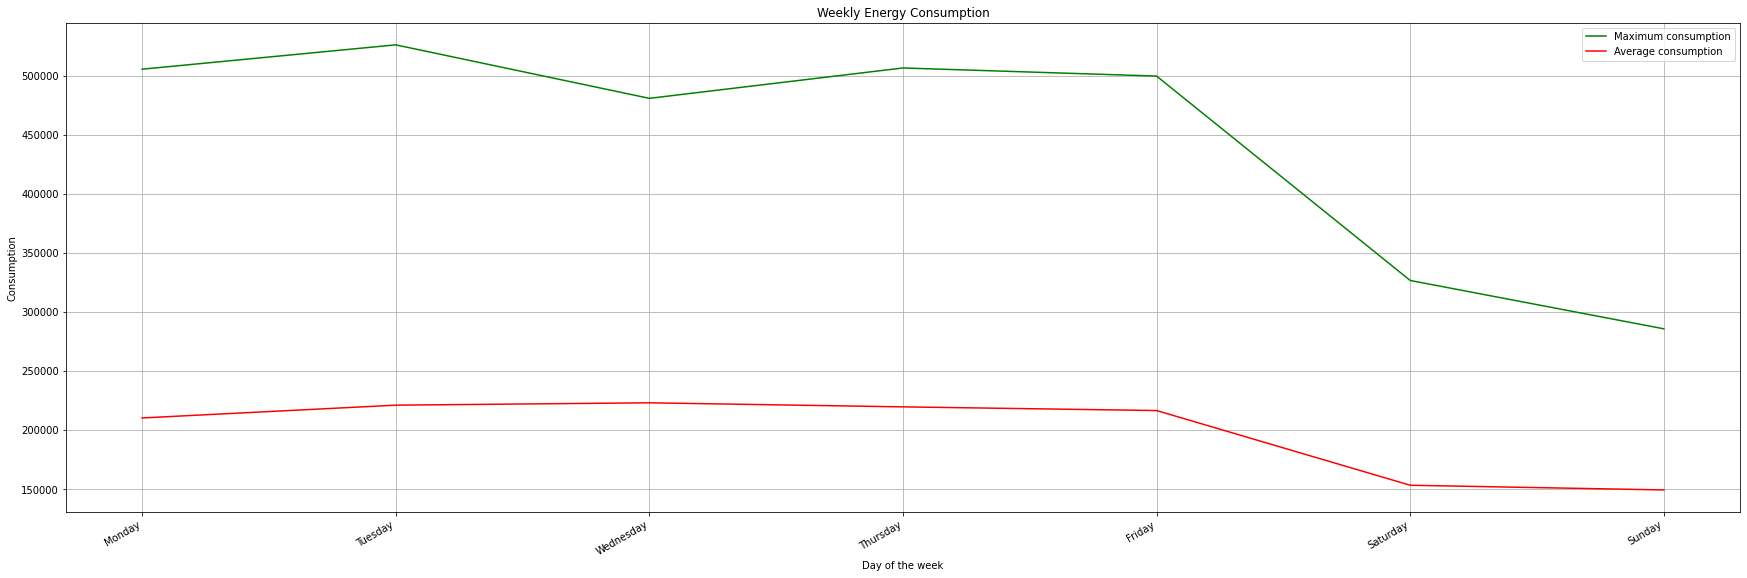

In [110]:
# function to plot the first week
def plot_weekly_consumption():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(
        df["Value"].groupby(df["Day_of_week"]).max().index,
        df["Value"].groupby(df["Day_of_week"]).max().values,
        color="g",
        label="Maximum consumption",
    )
    ax.plot(
        df["Value"].groupby(df["Day_of_week"]).mean().index,
        df["Value"].groupby(df["Day_of_week"]).mean().values,
        color="r",
        label="Average consumption",
    )
    ax.set_title("Weekly Energy Consumption")
    ax.set_xlabel("Day of the week")
    ax.set_ylabel("Consumption")
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.xticks(
        [0, 1, 2, 3, 4, 5, 6],
        ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    )
    plt.show()

plot_weekly_consumption()


In [111]:
# add a column to datafame with 1 if it is a weekend day and 0 if it is a weekday
df["Weekend"] = df["Date"].dt.dayofweek.isin([5, 6]).astype(int)
df.tail()

,Date,Value,Year,Month,Day,Day_of_week,Hour,Minute,Second,Irradiance,Temperature,Weekend
395953,2022-11-13 23:56:00,97817.538,2022,11,13,6,23,56,0,96.0,11.3,1
395954,2022-11-13 23:57:00,97344.145,2022,11,13,6,23,57,0,96.0,11.3,1
395955,2022-11-13 23:58:00,96617.403,2022,11,13,6,23,58,0,96.0,11.3,1
395956,2022-11-13 23:59:00,96638.174,2022,11,13,6,23,59,0,96.0,11.3,1
395957,2022-11-14 00:00:00,99724.063,2022,11,14,0,0,0,0,96.0,11.3,0


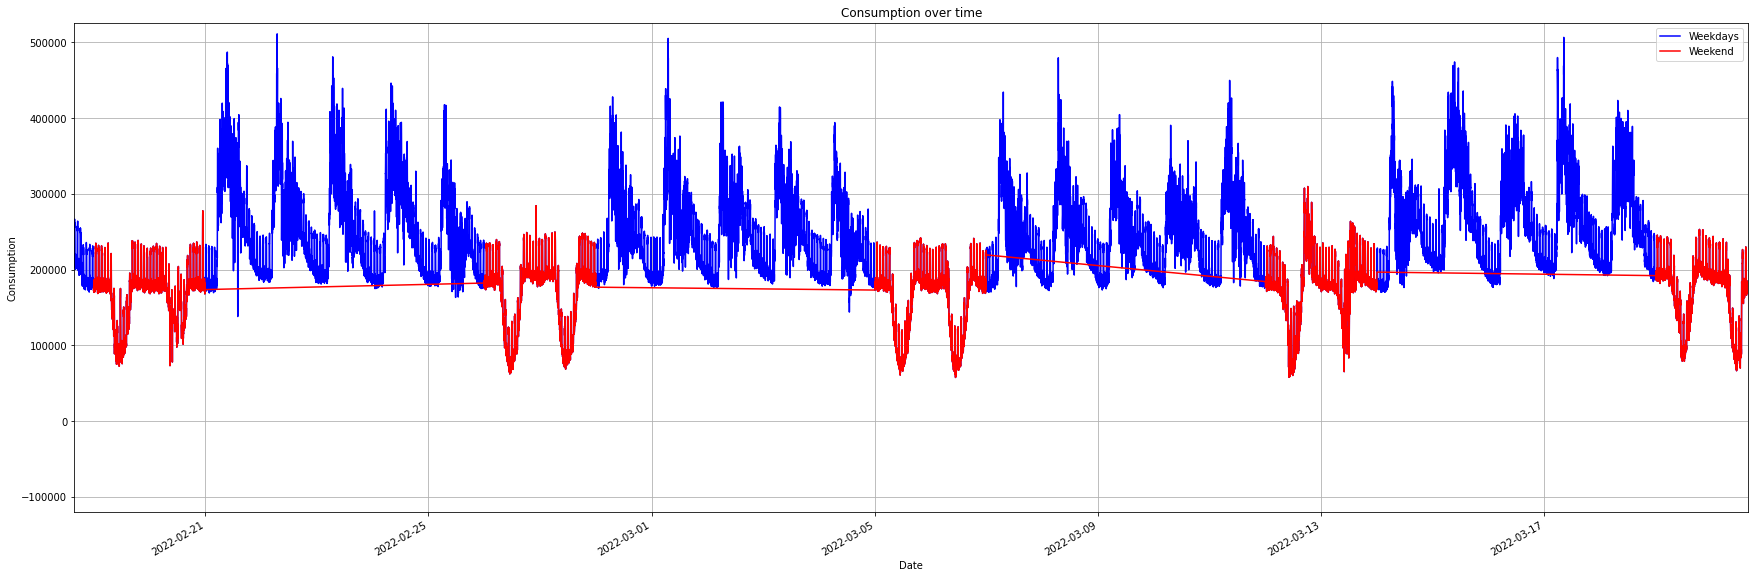

In [112]:
# function to plot the value with another color for the weekend days
def plot_consumption_over_time_weekend():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df["Date"], df["Value"], color="blue", label="Weekdays")
    ax.plot(
        df[df["Weekend"] == 1]["Date"],
        df[df["Weekend"] == 1]["Value"],
        color="red",
        label="Weekend",
    )
    ax.set_title("Consumption over time")
    ax.set_xlabel("Date")
    ax.set_ylabel("Consumption")
    ax.set_xlim(df["Date"].min(), df["Date"].min() + pd.Timedelta(days=30))
    ax.set_ylim(df["Value"].min(), df["Value"].max())
    ax.grid(True)
    fig.autofmt_xdate()
    ax.legend()
    plt.show()


plot_consumption_over_time_weekend()


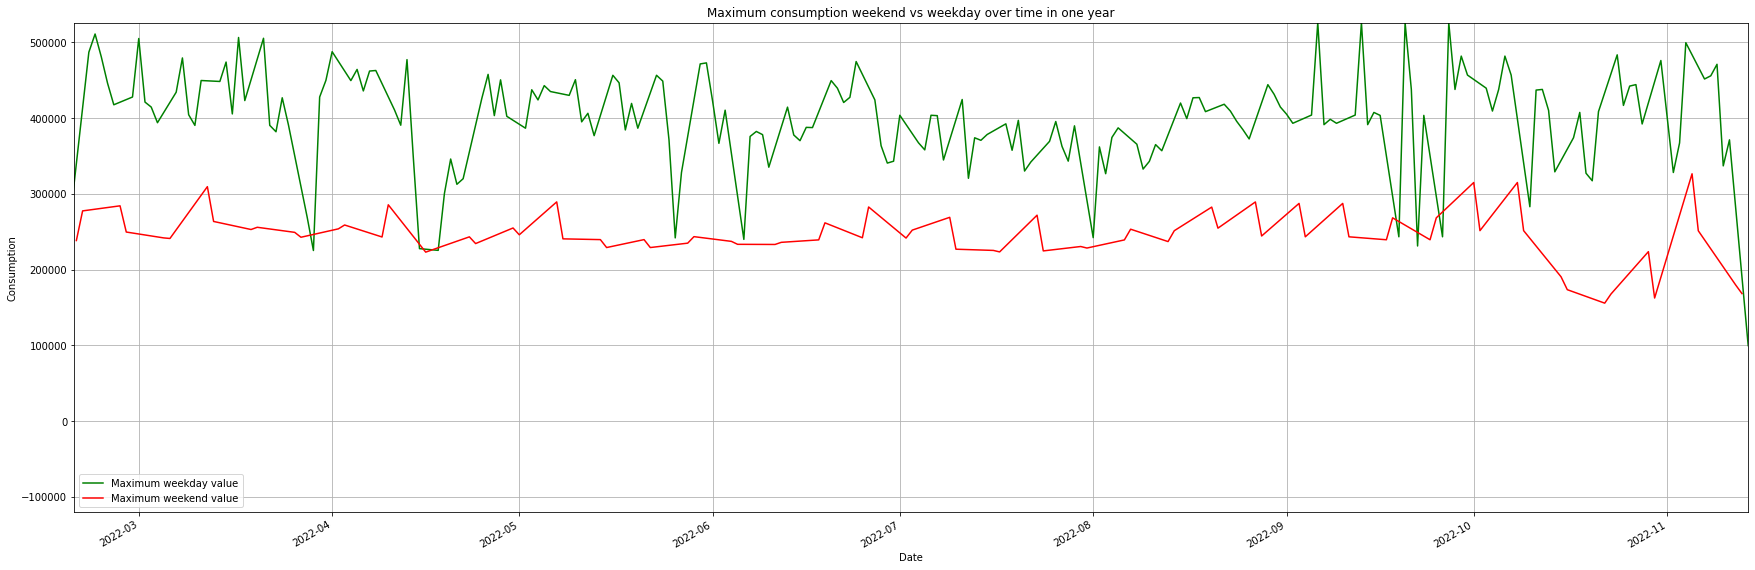

In [113]:
def plot_consumption_over_time_weekend_vs_weekday():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(
        df[df["Weekend"] == 0].groupby(df["Date"].dt.date)["Value"].max(),
        color="green",
        label="Maximum weekday value",
    )
    ax.plot(
        df[df["Weekend"] == 1].groupby(df["Date"].dt.date)["Value"].max(),
        color="red",
        label="Maximum weekend value",
    )
    ax.set_title("Maximum consumption weekend vs weekday over time in one year")
    ax.set_xlabel("Date")
    ax.set_ylabel("Consumption")
    ax.set_xlim(df["Date"].min(), df["Date"].max())
    ax.set_ylim(df["Value"].min(), df["Value"].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()


plot_consumption_over_time_weekend_vs_weekday()


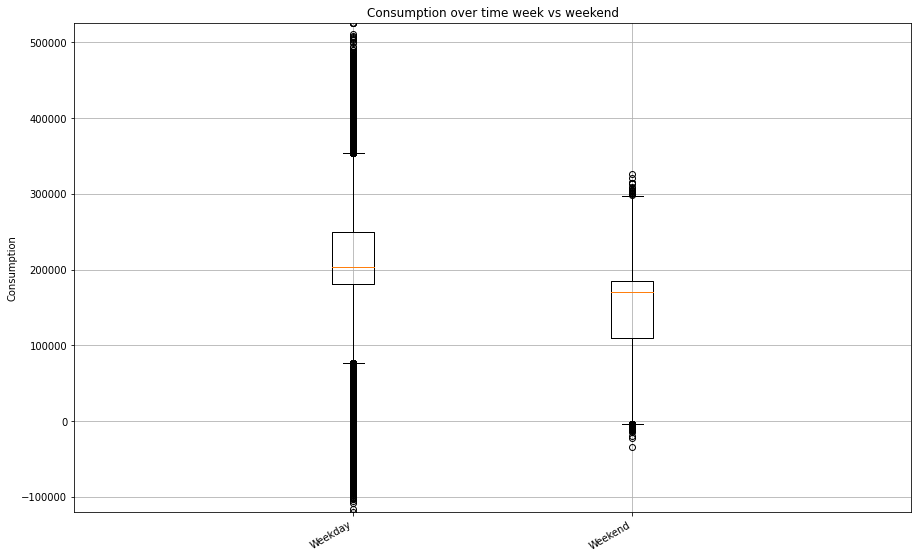

In [114]:
def plot_consumption_over_time_weekend_boxplot():
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.boxplot([df[df["Weekend"] == 0]["Value"], df[df["Weekend"] == 1]["Value"]])
    ax.set_title("Consumption over time week vs weekend")
    ax.set_ylabel("Consumption")
    ax.set_xlim(0, 3)
    ax.set_ylim(df["Value"].min(), df["Value"].max())
    ax.grid(True)
    plt.xticks([1, 2], ["Weekday", "Weekend"])
    fig.autofmt_xdate()

    plt.show()

plot_consumption_over_time_weekend_boxplot()


## Winter vs Summer

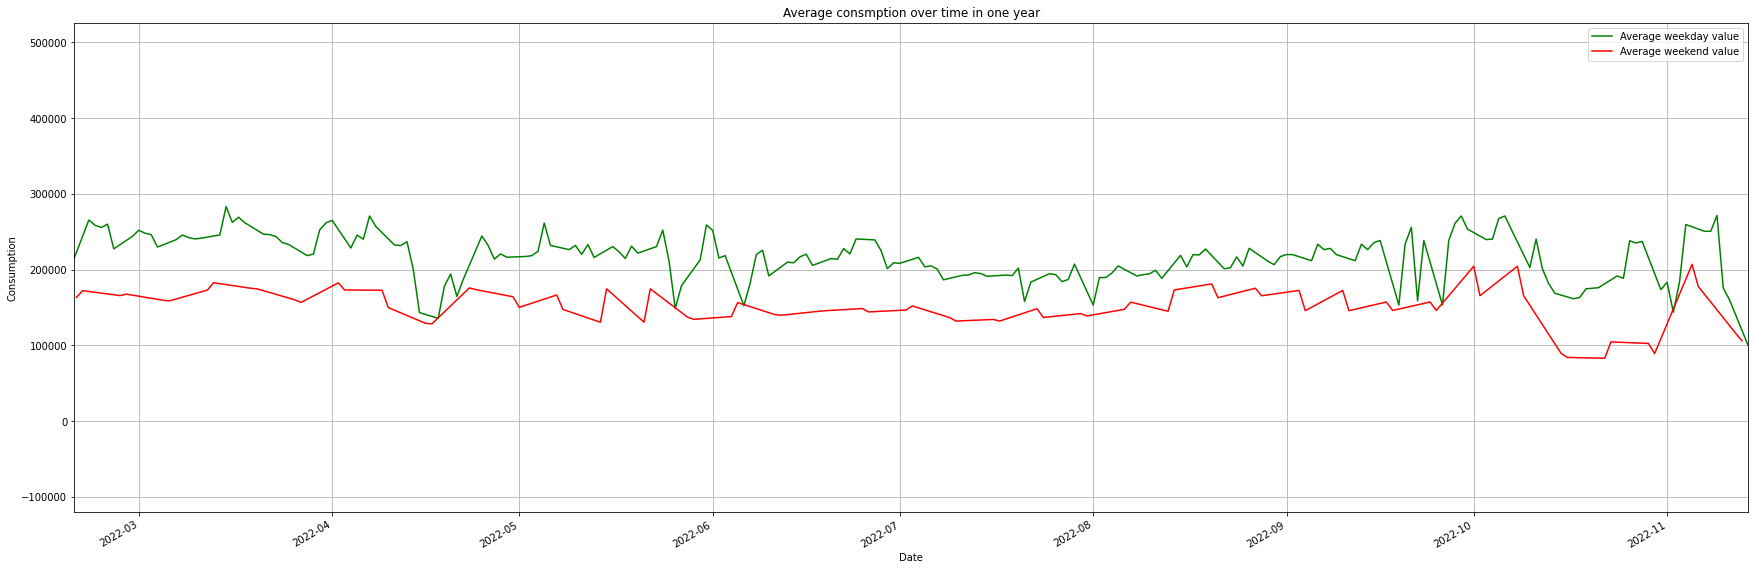

In [115]:
def plot_consumption_over_time_winter_peak():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(
        df[df["Weekend"] == 0].groupby(df["Date"].dt.date)["Value"].mean(),
        color="green",
        label="Average weekday value",
    )
    ax.plot(
        df[df["Weekend"] == 1].groupby(df["Date"].dt.date)["Value"].mean(),
        color="red",
        label="Average weekend value",
    )
    ax.set_title("Average consmption over time in one year")
    ax.set_xlabel("Date")
    ax.set_ylabel("Consumption")
    ax.set_xlim(df["Date"].min(), df["Date"].max())
    ax.set_ylim(df["Value"].min(), df["Value"].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

plot_consumption_over_time_winter_peak()


In [116]:
# winter 1 and summer 0
df["Winter"] = df["Date"].dt.month.isin([11, 12, 1, 2, 3]).astype(int)
df.tail()
df.sort_values(by="Date", inplace=True)

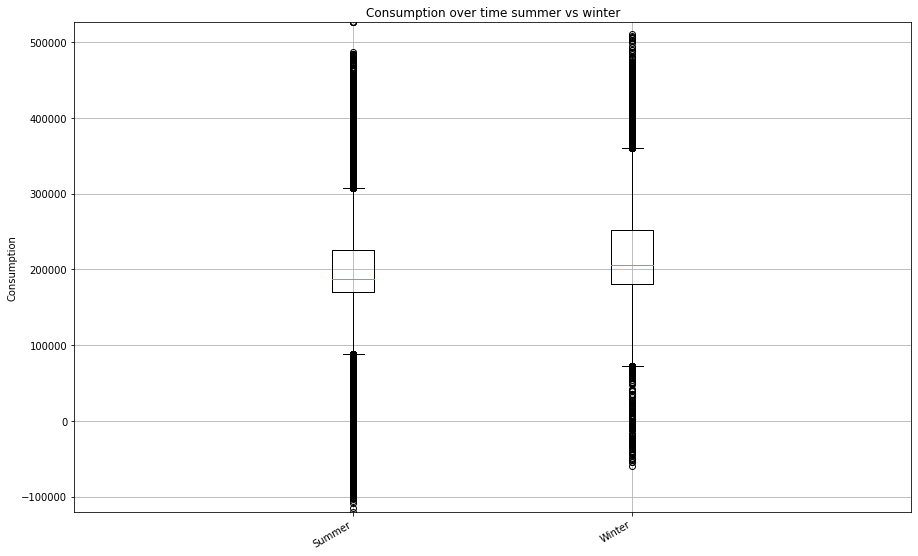

In [117]:
def plot_consumption_over_time_winter_boxplot():
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.boxplot([df[df["Winter"] == 0]["Value"], df[df["Winter"] == 1]["Value"]])
    ax.set_title("Consumption over time summer vs winter")
    ax.set_ylabel("Consumption")
    ax.set_xlim(0, 3)
    ax.set_ylim(df["Value"].min(), df["Value"].max())
    ax.grid(True)
    plt.xticks([1, 2], ["Summer", "Winter"])
    fig.autofmt_xdate()

    plt.show()

plot_consumption_over_time_winter_boxplot()

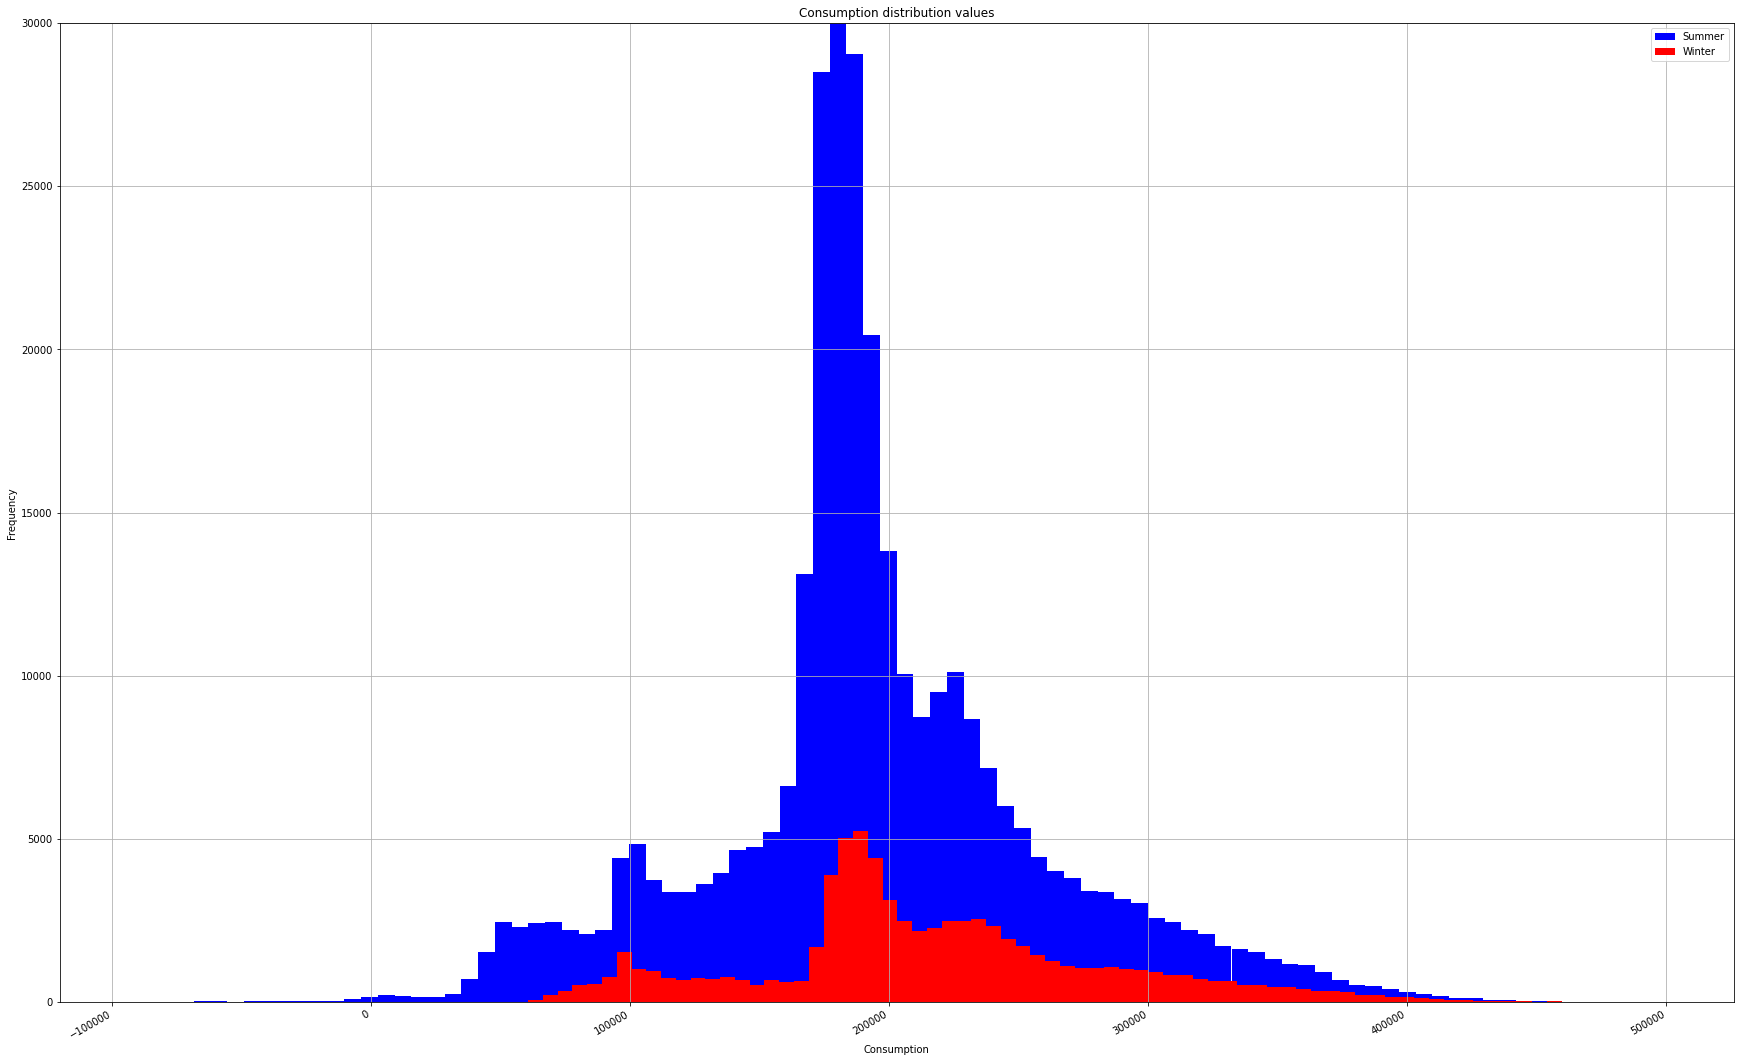

In [118]:
def plot_consumption_over_time_winter_distribution():
    fig, ax = plt.subplots(figsize=(30, 20))
    ax.hist(df[df["Winter"] == 0]["Value"], bins=100, color="blue", label="Summer")
    ax.hist(df[df["Winter"] == 1]["Value"], bins=100, color="red", label="Winter")
    ax.set_title("Consumption distribution values")
    ax.set_xlabel("Consumption")
    ax.set_ylabel("Frequency")
    ax.set_xlim(df["Value"].min(), df["Value"].max())
    ax.set_ylim(0, 30000)
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

plot_consumption_over_time_winter_distribution()

## Working hours vs Free hours vs Transition morning vs Transition evening

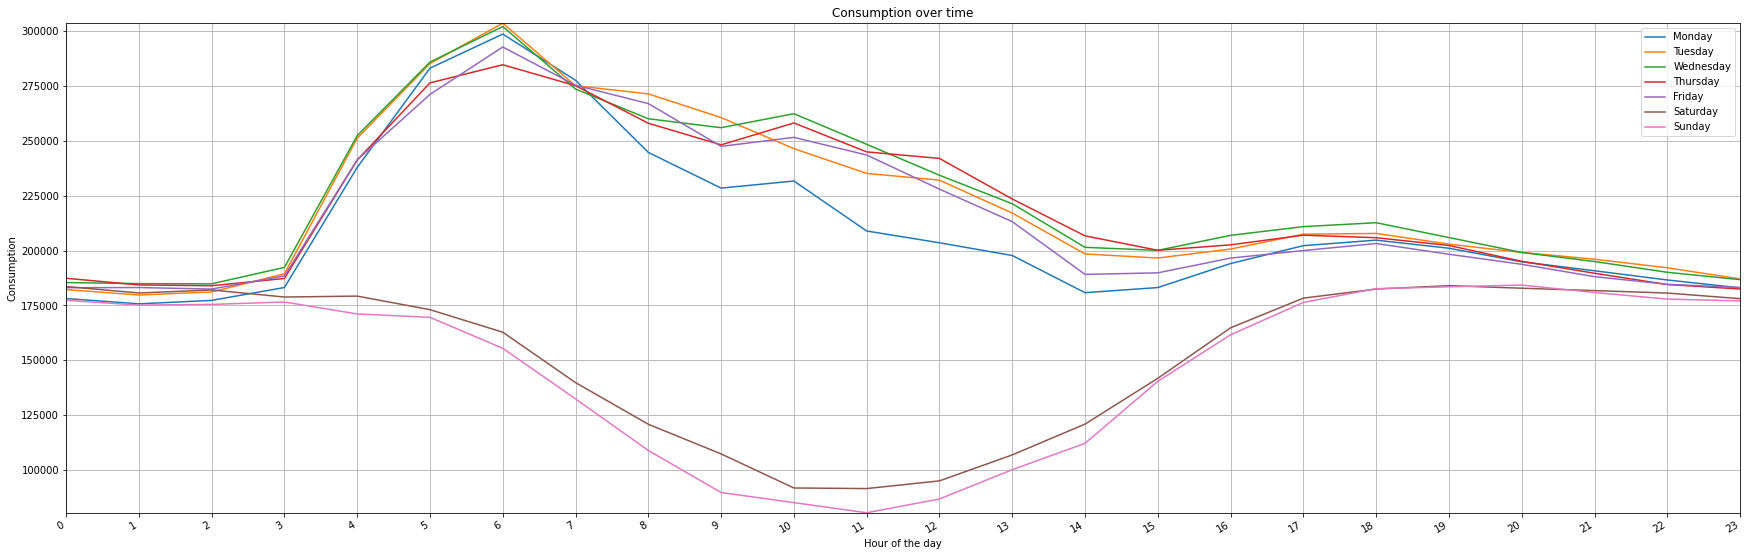

In [119]:
fig, ax = plt.subplots(figsize=(30, 10))

df["Day of the week"] = df["Date"].dt.dayofweek
df["Hour of the day"] = df["Date"].dt.hour

df_grouped = df.groupby(["Day of the week", "Hour of the day"])["Value"].mean()
df_grouped = df_grouped.reset_index()

for day in range(7):
    ax.plot(
        df_grouped[df_grouped["Day of the week"] == day]["Hour of the day"],
        df_grouped[df_grouped["Day of the week"] == day]["Value"],
        label=day,
    )

ax.set_title("Consumption over time")
ax.set_xlabel("Hour of the day")
ax.set_ylabel("Consumption")
ax.set_xlim(df_grouped["Hour of the day"].min(), df_grouped["Hour of the day"].max())
ax.set_ylim(df_grouped["Value"].min(), df_grouped["Value"].max())
ax.set_xticks(range(24))

ax.grid(True)

import calendar

ax.legend([calendar.day_name[day] for day in range(7)])
fig.autofmt_xdate()
plt.show()

In [120]:
df["Working hour"] = ((df["Date"].dt.hour >= 6) & (df["Date"].dt.hour < 15)).astype(int)
df["Transition morning"] = (
    (df["Date"].dt.hour >= 3) & (df["Date"].dt.hour < 6)
).astype(int)
df["Transition evening"] = (
    (df["Date"].dt.hour >= 15) & (df["Date"].dt.hour < 19)
).astype(int)

# Make a column that can take 4 values, 0 if the hour is between 3 and 6, 1 if the hour is between 6 and 15, 2 if the hour is between 15 and 19, 3 otherwise
df["Type of hour"] = df["Date"].dt.hour.apply(
    lambda x: 0
    if (x >= 3) & (x < 6)
    else 1
    if (x >= 6) & (x < 15)
    else 2
    if (x >= 15) & (x < 19)
    else 3
)

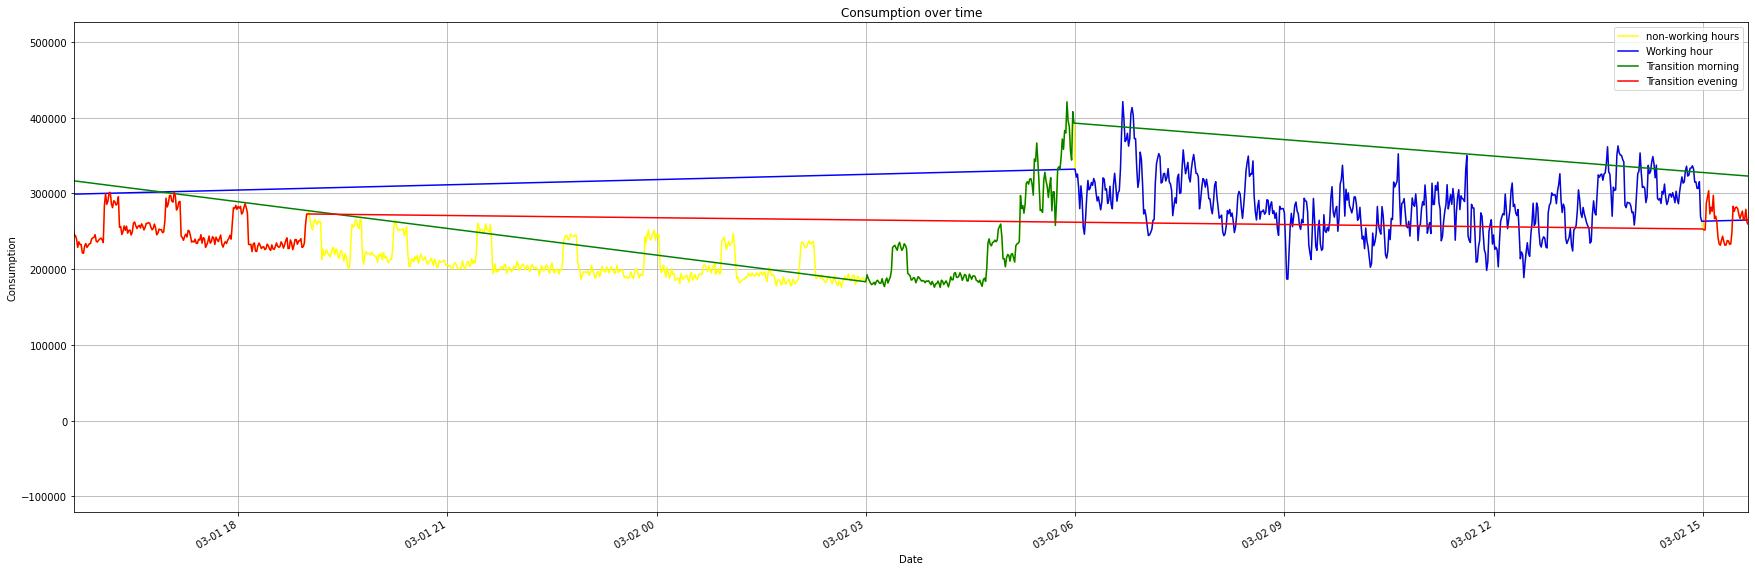

In [121]:
# plot the consumption over time
def plot_day(x):
    fig, ax = plt.subplots(figsize=(30, 10))
    # use a different color for the working hour, transition morning and transition evening
    ax.plot(df["Date"], df["Value"], color="yellow", label="non-working hours")
    ax.plot(
        df[df["Working hour"] == 1]["Date"],
        df[df["Working hour"] == 1]["Value"],
        color="blue",
        label="Working hour",
    )
    ax.plot(
        df[df["Transition morning"] == 1]["Date"],
        df[df["Transition morning"] == 1]["Value"],
        color="green",
        label="Transition morning",
    )
    ax.plot(
        df[df["Transition evening"] == 1]["Date"],
        df[df["Transition evening"] == 1]["Value"],
        color="red",
        label="Transition evening",
    )

    ax.set_title("Consumption over time")
    ax.set_xlabel("Date")
    ax.set_ylabel("Consumption")
    ax.set_xlim(
        df["Date"].min() + pd.DateOffset(days=x),
        df["Date"].min() + pd.DateOffset(days=x + 1),
    )
    ax.set_ylim(df["Value"].min(), df["Value"].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()

    plt.show()

plot_day(11)

## Holiday Feature

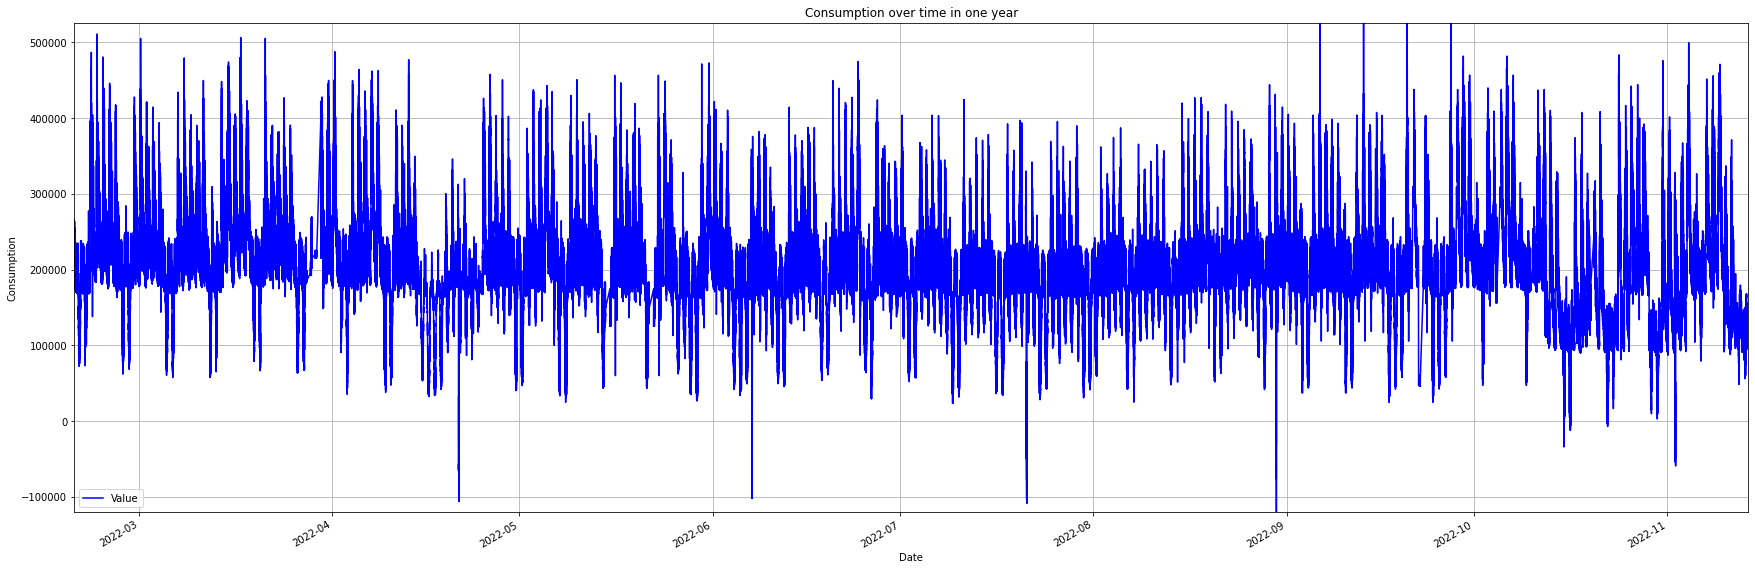

In [122]:
# plot value over time
def plot_consumption_over_time():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df["Date"], df["Value"], color="blue", label="Value")
    ax.set_title("Consumption over time in one year")
    ax.set_xlabel("Date")
    ax.set_ylabel("Consumption")
    ax.set_xlim(df["Date"].min(), df["Date"].max())
    ax.set_ylim(df["Value"].min(), df["Value"].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

plot_consumption_over_time()

In [123]:
# add a column holiday 1 between 2022-04-20 and 2022-04-28  and specific date 1/08/2022  0 otherwise
df["Holiday"] = (
    ((df["Date"] >= "2022-04-15") & (df["Date"] <= "2022-04-25"))
    | ((df["Date"] >= "2022-08-01") & (df["Date"] <= "2022-08-01"))
    | ((df["Date"] >= "2022-09-20") & (df["Date"] <= "2022-09-20"))
    | ((df["Date"] >= "2022-12-24") & (df["Date"] <= "2022-09-25"))
).astype(int)

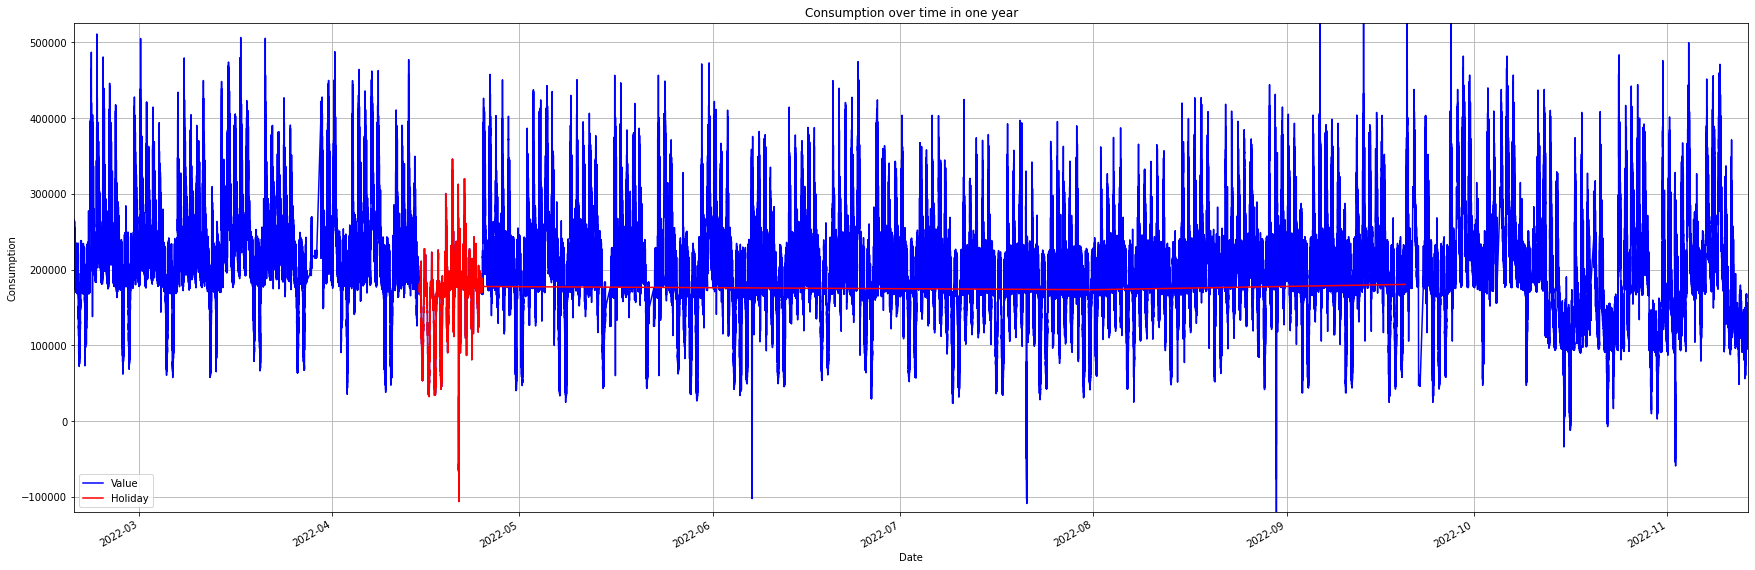

In [124]:
# plot value over time with holidays in anotehr color
def plot_consumption_over_time_holiday():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df["Date"], df["Value"], color="blue", label="Value")
    ax.plot(
        df[df["Holiday"] == 1]["Date"],
        df[df["Holiday"] == 1]["Value"],
        color="red",
        label="Holiday",
    )
    ax.set_title("Consumption over time in one year")
    ax.set_xlabel("Date")
    ax.set_ylabel("Consumption")
    ax.set_xlim(df["Date"].min(), df["Date"].max())
    ax.set_ylim(df["Value"].min(), df["Value"].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

plot_consumption_over_time_holiday()


## Normalized feature for Value

In [125]:
# add a column with the normalized value
df["Normalized"] = (df["Value"] - df["Value"].min()) / (
    df["Value"].max() - df["Value"].min()
)

In [126]:
df.head()

,Date,Value,Year,Month,Day,Day_of_week,Hour,Minute,Second,Irradiance,Temperature,Weekend,Winter,Day of the week,Hour of the day,Working hour,Transition morning,Transition evening,Type of hour,Holiday,Normalized
0,2022-02-18 15:39:00,212141.645,2022,2,18,4,15,39,0,134.0,12.8,0,1,4,15,0,0,1,2,0,0.514366
1,2022-02-18 15:40:00,216980.618,2022,2,18,4,15,40,0,134.0,12.8,0,1,4,15,0,0,1,2,0,0.521853
2,2022-02-18 15:41:00,219702.692,2022,2,18,4,15,41,0,134.0,12.8,0,1,4,15,0,0,1,2,0,0.526065
3,2022-02-18 15:42:00,218002.962,2022,2,18,4,15,42,0,134.0,12.8,0,1,4,15,0,0,1,2,0,0.523435
4,2022-02-18 15:43:00,219366.764,2022,2,18,4,15,43,0,134.0,12.8,0,1,4,15,0,0,1,2,0,0.525545


## Pattern


In [127]:
df["Peak"] = 0
# if normalized value is greater than 0.3 but smaller than 1, it is a peak but for non working hours
df.loc[
    (df["Normalized"] > 0.52)
    & (df["Normalized"] < 0.60)
    & (df["Working hour"] == 0)
    & (df["Transition evening"] == 0),
    "Peak",
] = 1


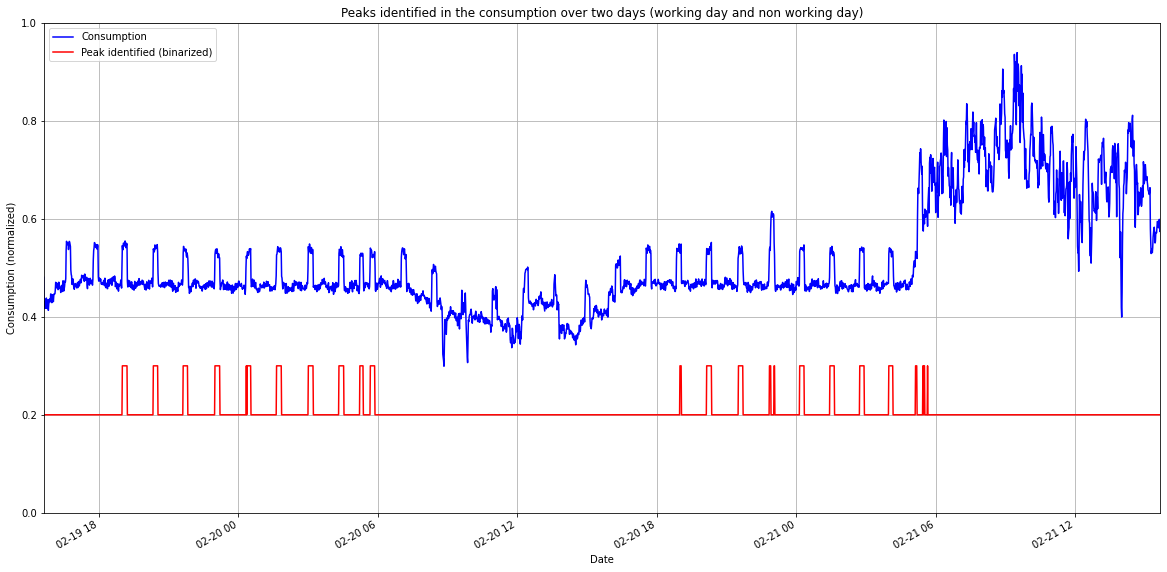

In [128]:
# plot the value with another color for the peak values
def plot_consommation_over_time_peak():
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(df["Date"], df["Normalized"], color="blue", label="Consumption")
    # plot the peak column
    ax.plot(
        df["Date"],
        0.1 * df["Peak"] + 0.2,
        color="red",
        label="Peak identified (binarized)",
    )
    # add to the right another scale for the peak column
    ax.set_title(
        "Peaks identified in the consumption over two days (working day and non working day)"
    )
    ax.set_xlabel("Date")
    ax.set_ylabel("Consumption (normalized)")
    ax.set_xlim(
        df["Date"].min() + pd.Timedelta(days=1), df["Date"].min() + pd.Timedelta(days=3)
    )
    ax.set_ylim(df["Normalized"].min(), df["Normalized"].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    # save the figure
    plt.show()

plot_consommation_over_time_peak()

In [129]:
# drop columns working hour, transition morning and transition evening
df.drop(
    ["Working hour", "Transition morning", "Transition evening"], axis=1, inplace=True
)

## Generate Cycle for Dates

In [130]:
def generate_cycle(array, nb_div):
    re_part = np.ones(len(array))
    im_part = np.ones(len(array))

    for k in range(len(array)):
        z = np.exp(array[k] * 2j * np.pi / nb_div)
        re_part[k] = np.real(z)
        im_part[k] = np.imag(z)

    return re_part, im_part

In [131]:
def plot_cycle(re_part, im_part, title):
    fig, ax = plt.subplots(figsize=(6, 5))
    ax.plot(re_part, im_part, "+")
    ax.set_title(title)
    ax.set_xlabel("Real Part")
    ax.set_ylabel("Imaginary Part")
    ax.grid(True)
    plt.show()

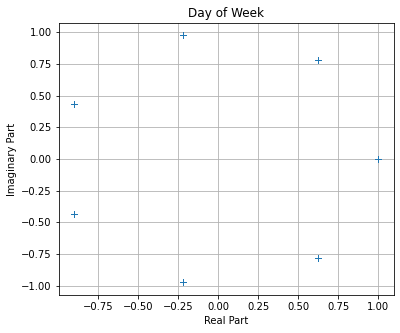

In [132]:
day_of_week_re, day_of_week_im = generate_cycle(df["Day_of_week"].to_numpy(), 7)
plot_cycle(day_of_week_re, day_of_week_im, "Day of Week")

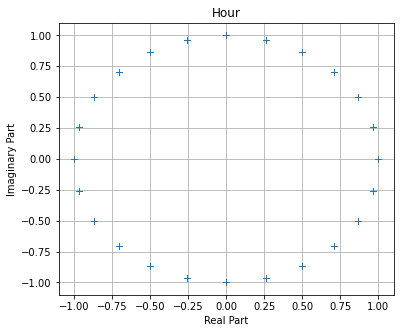

In [133]:
hour_re, hour_im = generate_cycle(df["Hour"].to_numpy(), 24)
plot_cycle(hour_re, hour_im, "Hour")

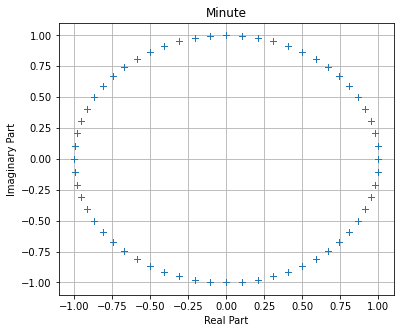

In [134]:
minute_re, minute_im = generate_cycle(df["Minute"].to_numpy(), 60)
plot_cycle(minute_re, minute_im, "Minute")

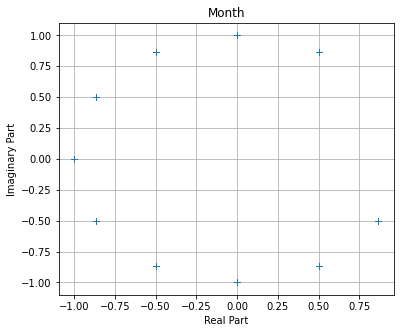

In [135]:
month_re, month_im = generate_cycle(df["Month"].to_numpy(), 12)
plot_cycle(month_re, month_im, "Month")

In [136]:
def generate_cycle_days(days, months, year):
    re_part = np.ones(len(days))
    im_part = np.ones(len(days))

    lst_31 = [1, 3, 5, 7, 8, 10, 12]  # Months with 31 days
    lst_30 = [4, 6, 9, 11]  # Months with 30 days

    for k in range(len(days)):
        if months[k] in lst_31:
            nb_div = 31
        elif months[k] in lst_30:
            nb_div = 30
        elif months[k] == 2:
            if year[k] % 4 == 0 and year[k] % 100 != 0 or year[k] % 400 == 0:
                nb_div = 29
            else:
                nb_div = 29
        else:
            print("Error in Months")
            break

        z = np.exp(days[k] * 2j * np.pi / nb_div)
        re_part[k] = np.real(z)
        im_part[k] = np.imag(z)

    return re_part, im_part

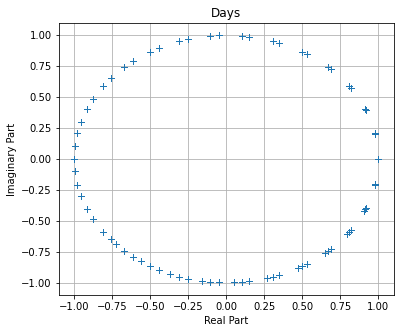

In [137]:
days_re, days_im = generate_cycle_days(
    df["Day"].to_numpy(), df["Month"].to_numpy(), df["Year"].to_numpy()
)
plot_cycle(days_re, days_im, "Days")

In [138]:
param = list(set(list(df.columns)) - set(["Second", "Year"]))
new_df = df[param]
new_df = new_df.assign(Day_of_Week_re=day_of_week_re.tolist())
new_df = new_df.assign(Day_of_Week_im=day_of_week_im.tolist())
new_df = new_df.assign(Hour_re=hour_re.tolist())
new_df = new_df.assign(Hour_im=hour_im.tolist())
new_df = new_df.assign(Minute_re=minute_re.tolist())
new_df = new_df.assign(Minute_im=minute_im.tolist())
new_df = new_df.assign(Month_re=month_re.tolist())
new_df = new_df.assign(Month_im=month_im.tolist())
new_df = new_df.assign(Day_re=days_re.tolist())
new_df = new_df.assign(Day_im=days_im.tolist())

In [139]:
# drop Hour of the day
new_df = new_df.drop(["Hour of the day"], axis=1)
new_df = new_df.drop(["Day_of_week"], axis=1)
new_df = new_df.drop(["Day of the week"], axis=1)

In [140]:
new_df.head()

,Temperature,Day,Holiday,Weekend,Value,Type of hour,Normalized,Winter,Date,Month,Peak,Minute,Irradiance,Hour,Day_of_Week_re,Day_of_Week_im,Hour_re,Hour_im,Minute_re,Minute_im,Month_re,Month_im,Day_re,Day_im
0,12.8,18,0,0,212141.645,2,0.514366,1,2022-02-18 15:39:00,2,0,39,134.0,15,-0.900969,-0.433884,-0.707107,-0.707107,-0.587785,-0.809017,0.5,0.866025,-0.725995,-0.687699
1,12.8,18,0,0,216980.618,2,0.521853,1,2022-02-18 15:40:00,2,0,40,134.0,15,-0.900969,-0.433884,-0.707107,-0.707107,-0.500000,-0.866025,0.5,0.866025,-0.725995,-0.687699
2,12.8,18,0,0,219702.692,2,0.526065,1,2022-02-18 15:41:00,2,0,41,134.0,15,-0.900969,-0.433884,-0.707107,-0.707107,-0.406737,-0.913545,0.5,0.866025,-0.725995,-0.687699
3,12.8,18,0,0,218002.962,2,0.523435,1,2022-02-18 15:42:00,2,0,42,134.0,15,-0.900969,-0.433884,-0.707107,-0.707107,-0.309017,-0.951057,0.5,0.866025,-0.725995,-0.687699
4,12.8,18,0,0,219366.764,2,0.525545,1,2022-02-18 15:43:00,2,0,43,134.0,15,-0.900969,-0.433884,-0.707107,-0.707107,-0.207912,-0.978148,0.5,0.866025,-0.725995,-0.687699


## Windowing

In [141]:
# Add a column with the value at the exact same time the day before
new_df["Yesterday"] = new_df["Normalized"].shift(24 * 60)
# Add a column with the value at the exact same time one week before
new_df["Last_week"] = new_df["Normalized"].shift(24 * 60 * 7)
# Add a column with the value at the exact same time 12 hours before
new_df["12_hours_before"] = new_df["Normalized"].shift(12 * 60)
# Add a column with the value at the exact same time 6 hours before
new_df["6_hours_before"] = new_df["Normalized"].shift(6 * 60)

In [142]:
# drop the first 24*60*7 rows
new_df = new_df.drop(new_df.index[0 : 24 * 60 * 7])

In [143]:
# drop normalized column
new_df = new_df.drop(["Normalized"], axis=1)

## Normalization

In [144]:
new_df["Temperature"] = (new_df["Temperature"] - new_df["Temperature"].min()) / (
    new_df["Temperature"].max() - new_df["Temperature"].min()
)
new_df["Irradiance"] = (new_df["Irradiance"] - new_df["Irradiance"].min()) / (
    new_df["Irradiance"].max() - new_df["Irradiance"].min()
)
new_df["Hour"] = (new_df["Hour"] - new_df["Hour"].min()) / (
    new_df["Hour"].max() - new_df["Hour"].min()
)
new_df["Month"] = (new_df["Month"] - new_df["Month"].min()) / (
    new_df["Month"].max() - new_df["Month"].min()
)
new_df["Minute"] = (new_df["Minute"] - new_df["Minute"].min()) / (
    new_df["Minute"].max() - new_df["Minute"].min()
)
new_df["Day"] = (new_df["Day"] - new_df["Day"].min()) / (
    new_df["Day"].max() - new_df["Day"].min()
)
new_df["Type of hour"] = (new_df["Type of hour"] - new_df["Type of hour"].min()) / (
    new_df["Type of hour"].max() - new_df["Type of hour"].min()
)

# Modeling with ANN

## Preparing the data for the model

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [146]:
# crop new_df from the beginning to 2022-09-15 00:00:00 using column date
new_df = new_df[new_df["Date"] < "2022-09-15 00:00:00"]

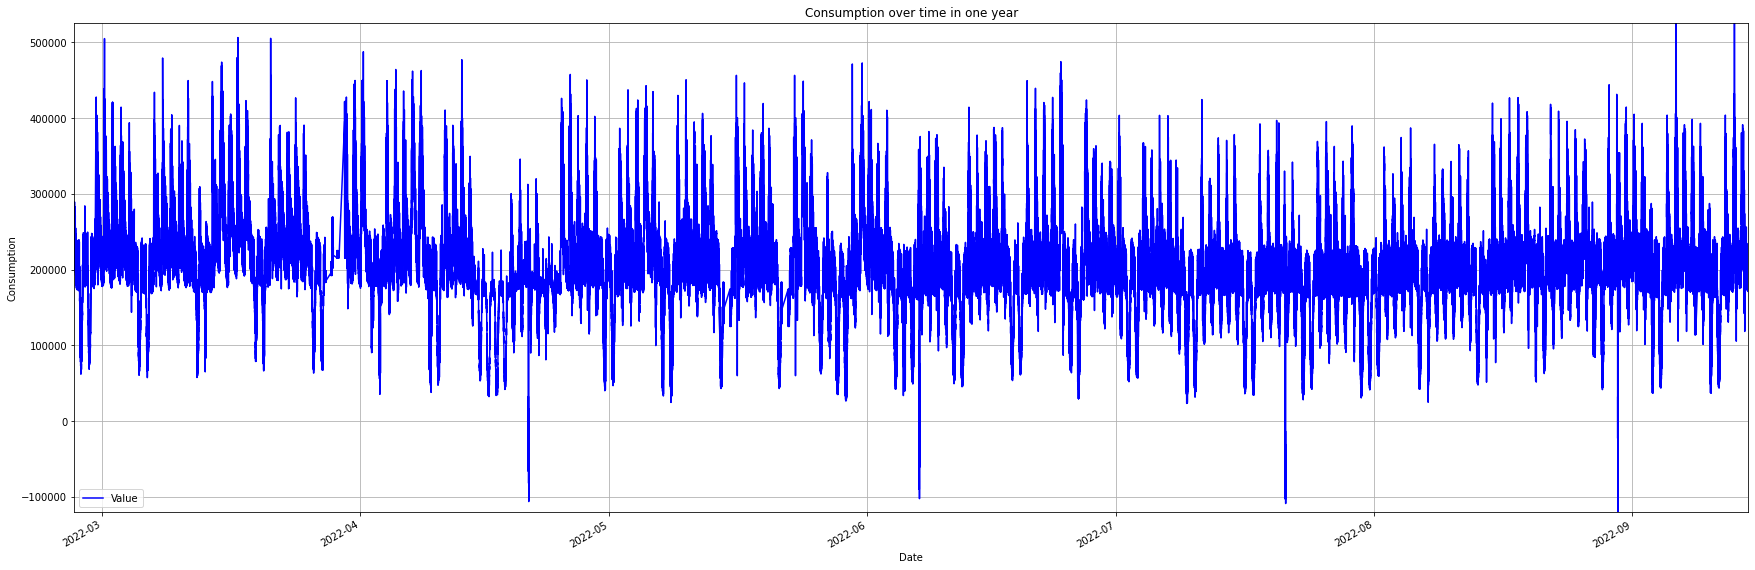

In [147]:
# plot value over time
def plot_consumption_over_time():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(new_df["Date"], new_df["Value"], color="blue", label="Value")
    ax.set_title("Consumption over time in one year")
    ax.set_xlabel("Date")
    ax.set_ylabel("Consumption")
    ax.set_xlim(new_df["Date"].min(), new_df["Date"].max())
    ax.set_ylim(new_df["Value"].min(), new_df["Value"].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

plot_consumption_over_time()


In [148]:
df_intra_day = new_df
df_next_day = new_df

In [149]:
#drop 6_hours_before column and 12 hours before column from next day
df_next_day = df_next_day.drop(["6_hours_before"], axis=1)
df_next_day = df_next_day.drop(["12_hours_before"], axis=1)

In [220]:
target_column = ["Value"]
predictors = list(set(list(df_intra_day.columns)) - set(target_column))

X = df_intra_day[predictors]
y = df_intra_day[target_column]
# Split into 70% train and 30% test not random to keep the time order
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [221]:
# create new datafram X_train and X-test without column date
X_train_ = X_train.drop(["Date"], axis=1)
X_test_ = X_test.drop(["Date"], axis=1)

In [222]:
X_train_.head()

,Day_of_Week_im,Minute,Day_re,Day_im,Month,Last_week,Minute_im,Type of hour,12_hours_before,Holiday,Yesterday,Hour_re,Peak,Weekend,Hour,Day_of_Week_re,Month_re,Winter,Temperature,Day,6_hours_before,Irradiance,Hour_im,Minute_re,Month_im
10080,-0.433884,0.677966,0.647386,-0.762162,0.0,0.514366,-0.866025,0.666667,0.470097,0,0.656709,-0.707107,0,0,0.652174,-0.900969,0.5,1,0.244156,0.8,0.614126,0.291373,-0.707107,-0.500000,0.866025
10081,-0.433884,0.694915,0.647386,-0.762162,0.0,0.521853,-0.913545,0.666667,0.475095,0,0.661901,-0.707107,0,0,0.652174,-0.900969,0.5,1,0.244156,0.8,0.589400,0.291373,-0.707107,-0.406737,0.866025
10082,-0.433884,0.711864,0.647386,-0.762162,0.0,0.526065,-0.951057,0.666667,0.471747,0,0.639111,-0.707107,0,0,0.652174,-0.900969,0.5,1,0.244156,0.8,0.577067,0.291373,-0.707107,-0.309017,0.866025
10083,-0.433884,0.728814,0.647386,-0.762162,0.0,0.523435,-0.978148,0.666667,0.464088,0,0.639108,-0.707107,0,0,0.652174,-0.900969,0.5,1,0.244156,0.8,0.619993,0.291373,-0.707107,-0.207912,0.866025
10084,-0.433884,0.745763,0.647386,-0.762162,0.0,0.525545,-0.994522,0.666667,0.467889,0,0.647721,-0.707107,0,0,0.652174,-0.900969,0.5,1,0.244156,0.8,0.667354,0.291373,-0.707107,-0.104528,0.866025


## Stochastic Gradient Descent

In [ ]:
# do gradient descent model
from sklearn.linear_model import SGDRegressor

# Create the model
sgd = SGDRegressor(max_iter=5500, learning_rate="constant", tol=1e-3, eta0=0.005)

# Fit the model
sgd.fit(X_train_, y_train)

In [ ]:
sgdpredictions = sgd.predict(X_test_)
y_test_sgd = y_test
y_pred_sgd = sgdpredictions

# add a column with the date taken from X_test to y_test_ and make sure the date is in the right order
y_test_sgd["Date"] = X_test["Date"]
# y_test_ = y_test_.sort_values(by=['Date'])
y_test_sgd.head()
# add a column with the value predicted Y_pred_ to y_test_
y_test_sgd["Value_pred"] = y_pred_sgd
y_test_sgd.head()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

# Compute the MAE, MSE, MAPE and RMSE
mae = mean_absolute_error(y_test_sgd.Value, y_test_sgd.Value_pred)
mse = mean_squared_error(y_test_sgd.Value, y_test_sgd.Value_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test_sgd.Value, y_test_sgd.Value_pred)
mape = mape * 100

# Print the results
print("MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("MAPE:", round(mape, 2), "%")

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_sgd.Value, y_test_sgd.Value_pred)

accuracy = r2 * 100

# Print the result
print("Accuracy:", round(accuracy, 2), "%")

In [ ]:
# grid search for sgd tuning
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search
param_grid = {
    "max_iter": [5000, 5500, 5600],
    # 'eta0': [0.005, 0.006, 0.007]
    # 'tol': [1e-3, 1e-4, 1e-5]
    "alpha": [0.0001, 0.00001, 0.000001],
}

In [ ]:
# Create a based model
sgd = SGDRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(
    estimator=sgd, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2
)

# Fit the grid search to the data
grid_search.fit(X_train_, y_train)

grid_search.best_params_

## Ridge Regression

In [74]:
# build a model using ridge regression
from sklearn.linear_model import Ridge

In [75]:
ridge = Ridge(alpha=550, normalize=False)
ridge.fit(X_train_, y_train)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


Ridge(alpha=550, normalize=False)

In [76]:
ridge_pred = ridge.predict(X_test_)

In [77]:
y_test_ridge = y_test
y_pred_ridge = ridge_pred

In [78]:
# add a column with the date taken from X_test to y_test_ and make sure the date is in the right order
y_test_ridge["Date"] = X_test["Date"]
# y_test_ = y_test_.sort_values(by=['Date'])
y_test_ridge.head()
# add a column with the value predicted Y_pred_ to y_test_
y_test_ridge["Value_pred"] = y_pred_ridge
y_test_ridge.head()

,Value,Date,Value_pred
220997,187969.688,2022-07-13 10:31:00,182075.692641
220998,207568.757,2022-07-13 10:32:00,186823.827466
220999,170588.327,2022-07-13 10:33:00,183009.703743
221000,171134.102,2022-07-13 10:34:00,187853.901406
221001,154144.495,2022-07-13 10:35:00,189695.928360


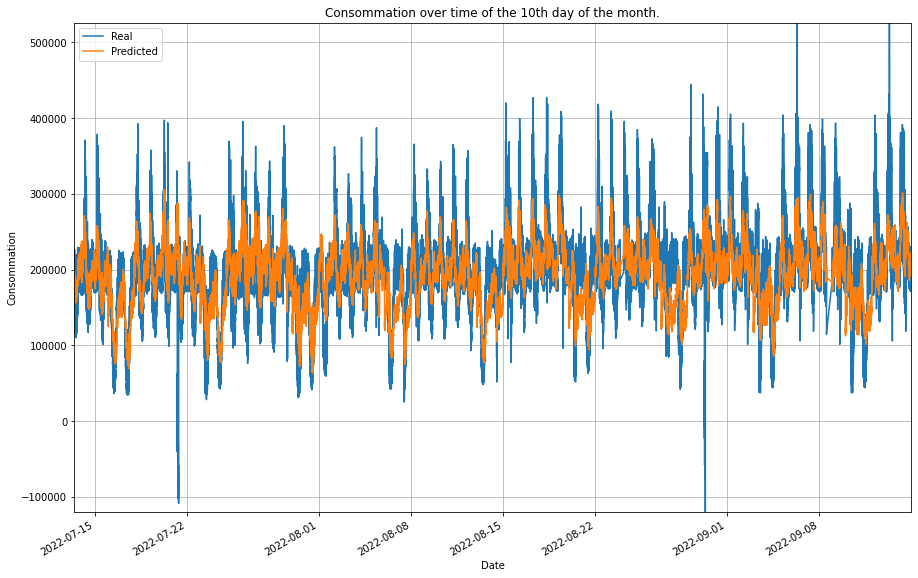

In [79]:
# plot the real value and the predicted value
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(y_test_ridge["Date"], y_test_ridge["Value"], label="Real Data")
ax.plot(y_test_ridge["Date"], y_test_ridge["Value_pred"], label="Predicted Data")
ax.set_title("Consumption over time.")
ax.set_xlabel("Date")
ax.set_ylabel("Consumption")
ax.set_xlim(y_test_ridge["Date"].min(), y_test_ridge["Date"].max())
ax.set_ylim(y_test_ridge["Value"].min(), y_test_ridge["Value"].max())
ax.grid(True)
ax.legend()
fig.autofmt_xdate()
plt.show()

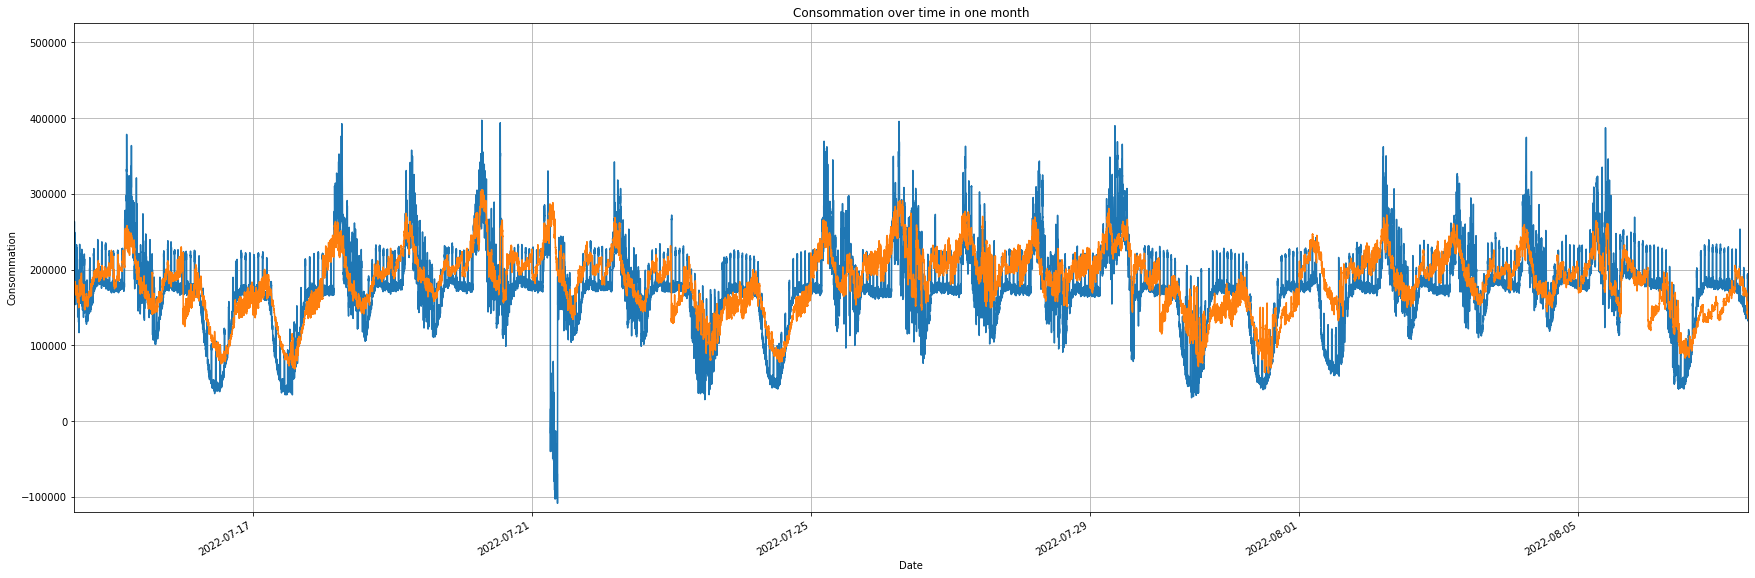

In [80]:
def plot_consumption_over_time_zoomed_graph():
    fig, ax = plt.subplots(figsize=(30, 10))

    ax.plot(y_test_ridge["Date"], y_test_ridge["Value"], label="Real")
    ax.plot(y_test_ridge["Date"], y_test_ridge["Value_pred"], label="Predicted")
    ax.set_title("Consumption over time in one month")
    ax.set_xlabel("Date")
    ax.set_ylabel("Consumption")

    ax.set_xlim(
        y_test_ridge["Date"].min() + pd.Timedelta(days=1),
        y_test_ridge["Date"].min() + pd.Timedelta(days=25),
    )
    ax.set_ylim(y_test_ridge["Value"].min(), y_test_ridge["Value"].max())
    ax.grid(True)
    fig.autofmt_xdate()
    plt.show()


plot_consumption_over_time_zoomed_graph()

In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

# Compute the MAE, MSE, MAPE and RMSE
mae = mean_absolute_error(y_test_ridge.Value, y_test_ridge.Value_pred)
mse = mean_squared_error(y_test_ridge.Value, y_test_ridge.Value_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test_ridge.Value, y_test_ridge.Value_pred)
mape = mape * 100

# Print the results
print("MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("MAPE:", round(mape, 2), "%")

MAE: 31425.43
MSE: 1707366556.15
RMSE: 41320.29
MAPE: 23.9 %


In [82]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_ridge.Value, y_test_ridge.Value_pred)

accuracy = r2 * 100

# Print the result
print("Accuracy:", round(accuracy, 2), "%")


Accuracy: 45.02 %


In [83]:
# do a grid search for the best parameters of ridge
from sklearn.model_selection import GridSearchCV

In [84]:
# Create the parameter grid based on the results of random search
param_grid = {
    "alpha": [450, 475, 500, 525, 550],
}

# Create a based model
ridge = Ridge()

# Instantiate the grid search model
grid_search = GridSearchCV(
    estimator=ridge, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2
)


In [85]:
# Fit the grid search to the data
grid_search.fit(X_train_, y_train)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=3, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [450, 475, 500, 525, 550]}, verbose=2)

In [86]:
grid_search.best_params_


{'alpha': 550}

## Support Vector Machine

In [87]:
# build a support vector machine model
from sklearn.svm import SVR

In [89]:
svr = SVR(kernel="rbf", C=1e3, gamma=0.1)

In [90]:
svr.fit(X_train_, y_train)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
svr_pred = svr.predict(X_test_)
y_test_svr = y_test
y_pred_svr = svr_pred

# add a column with the date taken from X_test to y_test_ and make sure the date is in the right order
y_test_svr["Date"] = X_test["Date"]
# y_test_ = y_test_.sort_values(by=['Date'])
y_test_svr.head()

# add a column with the value predicted Y_pred_ to y_test_
y_test_svr["Value_pred"] = y_pred_svr
y_test_svr.head()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

# Compute the MAE, MSE, MAPE and RMSE
mae = mean_absolute_error(y_test_svr.Value, y_test_svr.Value_pred)
mse = mean_squared_error(y_test_svr.Value, y_test_svr.Value_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test_svr.Value, y_test_svr.Value_pred)
mape = mape * 100

# Print the results
print("MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("MAPE:", round(mape, 2), "%")

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_svr.Value, y_test_svr.Value_pred)

accuracy = r2 * 100

# Print the result
print("Accuracy:", round(accuracy, 2), "%")

## Hypertuning the final model

In [819]:
# hypertune the parameters of the MLP regressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error


In [820]:
# Create the parameter grid based on the results of random search
param_grid = {
    "hidden_layer_sizes": [
        (300, 300, 300),
        (200, 200, 200),
        (100, 100, 100),
        (50, 50, 50),
    ],
    "activation": ["relu", "tanh", "logistic"],
    "solver": ["adam", "sgd"],
    "learning_rate": ["constant", "adaptive"],
    "learning_rate_init": [0.001, 0.0001],
    "max_iter": [400, 500, 600],
}


In [821]:
# Create a based model
mlp = MLPRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(
    estimator=mlp, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2
)


In [822]:
# Fit the grid search to the data
grid_search.fit(X_train_, y_train)


In [823]:
# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_search.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_search.best_score_)))


In [824]:
X_train_.head()


,Month_re,Minute_im,Winter,Peak,Weekend,Hour_im,Yesterday,Hour,12_hours_before,Minute_re,Day_of_Week_im,Day_re,Irradiance,Hour_re,Type of hour,Minute,Day,Holiday,Day_im,6_hours_before,Month,Temperature,Month_im,Last_week,Day_of_Week_re
10080,0.5,-0.866025,1,0,0,-0.707107,0.656709,0.652174,0.470097,-0.500000,-0.433884,0.647386,0.291373,-0.707107,0.666667,0.677966,0.8,0,-0.762162,0.614126,0.0,0.244156,0.866025,0.514366,-0.900969
10081,0.5,-0.913545,1,0,0,-0.707107,0.661901,0.652174,0.475095,-0.406737,-0.433884,0.647386,0.291373,-0.707107,0.666667,0.694915,0.8,0,-0.762162,0.589400,0.0,0.244156,0.866025,0.521853,-0.900969
10082,0.5,-0.951057,1,0,0,-0.707107,0.639111,0.652174,0.471747,-0.309017,-0.433884,0.647386,0.291373,-0.707107,0.666667,0.711864,0.8,0,-0.762162,0.577067,0.0,0.244156,0.866025,0.526065,-0.900969
10083,0.5,-0.978148,1,0,0,-0.707107,0.639108,0.652174,0.464088,-0.207912,-0.433884,0.647386,0.291373,-0.707107,0.666667,0.728814,0.8,0,-0.762162,0.619993,0.0,0.244156,0.866025,0.523435,-0.900969
10084,0.5,-0.994522,1,0,0,-0.707107,0.647721,0.652174,0.467889,-0.104528,-0.433884,0.647386,0.291373,-0.707107,0.666667,0.745763,0.8,0,-0.762162,0.667354,0.0,0.244156,0.866025,0.525545,-0.900969


## Find best number of epochs

In [552]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

mae_test = []
mae_train = []
mse_test = []
mse_train = []
rmse_test = []
rmse_train = []
mape_test = []
mape_train = []
r2_test = []
r2_train = []

for n in range(1, 21, 1):
    print(n)
    X = new_df[predictors]
    y = new_df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, shuffle=False
    )
    X_train_ = X_train.drop(["Date"], axis=1)
    X_test_ = X_test.drop(["Date"], axis=1)
    reg_all = MLPRegressor(
        hidden_layer_sizes=(300, 300, 300, 300, 300),
        activation="relu",
        solver="adam",
        alpha=0.0005,
        batch_size="auto",
        learning_rate="constant",
        learning_rate_init=0.0001,
        power_t=0.5,
        max_iter=n,
        shuffle=True,
        random_state=None,
        tol=0.0001,
        verbose=True,
        warm_start=False,
        momentum=0.9,
        nesterovs_momentum=True,
        early_stopping=False,
        validation_fraction=0.1,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-08,
    )
    reg_all.fit(X_train_, y_train)
    y_pred = reg_all.predict(X_test_)
    y_test_ = y_test
    y_pred_ = y_pred
    y_test_["Date"] = X_test["Date"]
    y_test_["Value_pred"] = y_pred_
    mae = mean_absolute_error(y_test_.Value, y_test_.Value_pred)
    mse = mean_squared_error(y_test_.Value, y_test_.Value_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test_.Value, y_test_.Value_pred)
    mape = mape * 100
    print("MAPE_test:", round(mape, 2), "%")
    r2 = r2_score(y_test_.Value, y_test_.Value_pred)
    accuracy = r2 * 100
    print("Accuracy_test:", round(accuracy, 2), "%")
    mae_test.append(mae)
    mse_test.append(mse)
    rmse_test.append(rmse)
    mape_test.append(mape)
    r2_test.append(accuracy)

    y_pred = reg_all.predict(X_train_)
    y_test_ = y_train
    y_pred_ = y_pred
    y_test_["Date"] = X_test["Date"]
    y_test_["Value_pred"] = y_pred_
    mae = mean_absolute_error(y_test_.Value, y_test_.Value_pred)
    mse = mean_squared_error(y_test_.Value, y_test_.Value_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test_.Value, y_test_.Value_pred)
    mape = mape * 100
    print("MAPE_train:", round(mape, 2), "%")
    r2 = r2_score(y_test_.Value, y_test_.Value_pred)
    accuracy = r2 * 100
    print("Accuracy_train:", round(accuracy, 2), "%")
    mae_train.append(mae)
    mse_train.append(mse)
    rmse_train.append(rmse)
    mape_train.append(mape)
    r2_train.append(accuracy)


1


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 5939226903.80343914


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


MAPE_test: 28.62 %
Accuracy_test: 1.53 %
MAPE_train: 26.09 %
Accuracy_train: 36.0 %
2


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 5983835767.40744495
Iteration 2, loss = 982404490.23230493


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(


MAPE_test: 21.47 %
Accuracy_test: 40.45 %
MAPE_train: 18.66 %
Accuracy_train: 63.45 %
3


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 6030548982.85635853
Iteration 2, loss = 1016299950.85763800
Iteration 3, loss = 650732613.25953615


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(


MAPE_test: 18.78 %
Accuracy_test: 55.78 %
MAPE_train: 15.13 %
Accuracy_train: 71.27 %
4


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 6094195380.27960110
Iteration 2, loss = 1039207307.26172411
Iteration 3, loss = 665628838.91016209
Iteration 4, loss = 556749392.97763228


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(


MAPE_test: 18.14 %
Accuracy_test: 59.49 %
MAPE_train: 14.27 %
Accuracy_train: 73.9 %
5


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 6023946214.27811527
Iteration 2, loss = 1025552095.51834810
Iteration 3, loss = 654224479.55710196
Iteration 4, loss = 551910333.44375432
Iteration 5, loss = 512844689.21248049


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


MAPE_test: 18.17 %
Accuracy_test: 61.53 %
MAPE_train: 13.48 %
Accuracy_train: 75.44 %
6


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 5879675740.24369144
Iteration 2, loss = 998831733.85911334
Iteration 3, loss = 645596167.97825980
Iteration 4, loss = 550295170.09225237
Iteration 5, loss = 513664775.00420016
Iteration 6, loss = 491524536.57019520


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6) reached and the optimization hasn't converged yet.
  warnings.warn(


MAPE_test: 18.39 %
Accuracy_test: 62.29 %
MAPE_train: 13.0 %
Accuracy_train: 76.24 %
7


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 5937684812.39157391
Iteration 2, loss = 1019587807.12364411
Iteration 3, loss = 656107992.00128877
Iteration 4, loss = 551649447.63147128
Iteration 5, loss = 511216871.12573135
Iteration 6, loss = 488797013.20068514
Iteration 7, loss = 473320092.32084298


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (7) reached and the optimization hasn't converged yet.
  warnings.warn(


MAPE_test: 19.61 %
Accuracy_test: 60.26 %
MAPE_train: 12.75 %
Accuracy_train: 77.05 %
8


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 5986726599.34519863
Iteration 2, loss = 1005265563.78531003
Iteration 3, loss = 651624494.75549233
Iteration 4, loss = 553329690.35850692
Iteration 5, loss = 513175155.94996870
Iteration 6, loss = 490038110.40737283
Iteration 7, loss = 473764645.99131817
Iteration 8, loss = 460162595.11924928


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  warnings.warn(


MAPE_test: 20.14 %
Accuracy_test: 58.83 %
MAPE_train: 12.38 %
Accuracy_train: 77.58 %
9


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 5992297216.68235111
Iteration 2, loss = 1028916725.13197517
Iteration 3, loss = 656648988.54070830
Iteration 4, loss = 555097780.29192269
Iteration 5, loss = 515655498.62981111
Iteration 6, loss = 492288584.59915322
Iteration 7, loss = 475945408.20440573
Iteration 8, loss = 462907769.68245107
Iteration 9, loss = 451551709.11134505


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (9) reached and the optimization hasn't converged yet.
  warnings.warn(


MAPE_test: 20.25 %
Accuracy_test: 57.42 %
MAPE_train: 12.5 %
Accuracy_train: 77.98 %
10


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 5914874721.91652203
Iteration 2, loss = 1018651312.08729148
Iteration 3, loss = 650308701.70275617
Iteration 4, loss = 551582332.38749599
Iteration 5, loss = 512733427.24016136
Iteration 6, loss = 490836628.40983462
Iteration 7, loss = 475132165.68072510
Iteration 8, loss = 462022314.44481957
Iteration 9, loss = 450912673.66014892
Iteration 10, loss = 440871413.15815741


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MAPE_test: 20.16 %
Accuracy_test: 58.19 %
MAPE_train: 12.3 %
Accuracy_train: 78.56 %
11


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 5895514346.20261478
Iteration 2, loss = 991852885.91420639
Iteration 3, loss = 649154208.81980109
Iteration 4, loss = 554159502.00339496
Iteration 5, loss = 515437588.79816490
Iteration 6, loss = 493497579.79687697
Iteration 7, loss = 477820379.95334655
Iteration 8, loss = 464626353.59888208
Iteration 9, loss = 452809047.19312364
Iteration 10, loss = 442201596.35147226
Iteration 11, loss = 432033616.92788142


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (11) reached and the optimization hasn't converged yet.
  warnings.warn(


MAPE_test: 21.83 %
Accuracy_test: 53.69 %
MAPE_train: 12.05 %
Accuracy_train: 79.03 %
12


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 5956081339.21280956
Iteration 2, loss = 1016210934.95991397
Iteration 3, loss = 655297718.30076742
Iteration 4, loss = 552407516.86369371
Iteration 5, loss = 512524239.29981351
Iteration 6, loss = 490656549.63144034
Iteration 7, loss = 474990751.80806571
Iteration 8, loss = 461760708.25988984
Iteration 9, loss = 450525799.04035723
Iteration 10, loss = 440381934.31371659
Iteration 11, loss = 431202055.10179067
Iteration 12, loss = 422312324.54546005


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (12) reached and the optimization hasn't converged yet.
  warnings.warn(


MAPE_test: 21.65 %
Accuracy_test: 55.14 %
MAPE_train: 11.79 %
Accuracy_train: 79.41 %
13


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 5945855557.97416210
Iteration 2, loss = 1026136931.61281812
Iteration 3, loss = 652361696.59099925
Iteration 4, loss = 551167389.53004456
Iteration 5, loss = 513843162.92693228
Iteration 6, loss = 494247963.32923079
Iteration 7, loss = 480264020.31769907
Iteration 8, loss = 468993464.65413159
Iteration 9, loss = 459266347.25766945
Iteration 10, loss = 450300500.73682582
Iteration 11, loss = 441574561.95346797
Iteration 12, loss = 433207653.03600007
Iteration 13, loss = 424486354.08973145


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (13) reached and the optimization hasn't converged yet.
  warnings.warn(


MAPE_test: 21.94 %
Accuracy_test: 53.98 %
MAPE_train: 11.86 %
Accuracy_train: 79.36 %
14


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 6039168409.82634640
Iteration 2, loss = 1005053569.21093023
Iteration 3, loss = 646904574.69931066
Iteration 4, loss = 548285368.73634160
Iteration 5, loss = 511434774.31577426
Iteration 6, loss = 490460428.79620510
Iteration 7, loss = 475070138.62712765
Iteration 8, loss = 461986382.87138838
Iteration 9, loss = 450678098.98508590
Iteration 10, loss = 440336238.15645641
Iteration 11, loss = 430974025.37915367
Iteration 12, loss = 421697821.22639585
Iteration 13, loss = 413103821.77381372
Iteration 14, loss = 405233030.77876920


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (14) reached and the optimization hasn't converged yet.
  warnings.warn(


MAPE_test: 25.6 %
Accuracy_test: 40.82 %
MAPE_train: 11.62 %
Accuracy_train: 80.32 %
15


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 5863394697.50756073
Iteration 2, loss = 1016279828.79605210
Iteration 3, loss = 650689318.53122294
Iteration 4, loss = 549516407.83508098
Iteration 5, loss = 511046077.14301521
Iteration 6, loss = 489465012.23207146
Iteration 7, loss = 473828679.23328525
Iteration 8, loss = 460216998.64140296
Iteration 9, loss = 448636006.63071692
Iteration 10, loss = 438250211.65945572
Iteration 11, loss = 427842834.44533688
Iteration 12, loss = 418664039.25246525
Iteration 13, loss = 409968665.79847050
Iteration 14, loss = 401877799.49452180
Iteration 15, loss = 394016038.34471011


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(


MAPE_test: 22.5 %
Accuracy_test: 50.6 %
MAPE_train: 11.23 %
Accuracy_train: 80.83 %
16


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 6048294908.77095699
Iteration 2, loss = 1051868395.21513462
Iteration 3, loss = 664721549.86729407
Iteration 4, loss = 554747720.47248816
Iteration 5, loss = 514560997.80963147
Iteration 6, loss = 492638765.21967983
Iteration 7, loss = 476258816.54280794
Iteration 8, loss = 462754917.52803195
Iteration 9, loss = 450662718.85971576
Iteration 10, loss = 439455123.73745143
Iteration 11, loss = 428927583.48456824
Iteration 12, loss = 418942506.56680858
Iteration 13, loss = 410121146.65873474
Iteration 14, loss = 401755854.44200850
Iteration 15, loss = 393728289.54512459
Iteration 16, loss = 386371974.70525396


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (16) reached and the optimization hasn't converged yet.
  warnings.warn(


MAPE_test: 23.74 %
Accuracy_test: 46.54 %
MAPE_train: 10.97 %
Accuracy_train: 81.14 %
17


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 5902618508.49249744
Iteration 2, loss = 1005901656.05437207
Iteration 3, loss = 648664239.52454424
Iteration 4, loss = 551330441.77364302
Iteration 5, loss = 510806005.95944095
Iteration 6, loss = 488123107.64146358
Iteration 7, loss = 471986629.39460665
Iteration 8, loss = 458518009.91972941
Iteration 9, loss = 447030905.66767931
Iteration 10, loss = 435540899.45252544
Iteration 11, loss = 425716353.07732683
Iteration 12, loss = 415682439.10733521
Iteration 13, loss = 406485272.29529703
Iteration 14, loss = 397975192.88710403
Iteration 15, loss = 390029970.92469484
Iteration 16, loss = 382651853.25764042
Iteration 17, loss = 375814981.48140657


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (17) reached and the optimization hasn't converged yet.
  warnings.warn(


MAPE_test: 22.95 %
Accuracy_test: 45.35 %
MAPE_train: 10.93 %
Accuracy_train: 81.48 %
18


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 5942041814.46490192
Iteration 2, loss = 1035187012.09537089
Iteration 3, loss = 656253057.57838309
Iteration 4, loss = 553032860.57341492
Iteration 5, loss = 515427267.99889338
Iteration 6, loss = 494016349.37177217
Iteration 7, loss = 478617802.18862808
Iteration 8, loss = 465809206.02132046
Iteration 9, loss = 454691664.72706223
Iteration 10, loss = 445030865.56092513
Iteration 11, loss = 435567960.83997279
Iteration 12, loss = 426758597.71081364
Iteration 13, loss = 418290763.92284918
Iteration 14, loss = 410663224.43956560
Iteration 15, loss = 402496394.81478977
Iteration 16, loss = 395357144.39515597
Iteration 17, loss = 388238159.02992570
Iteration 18, loss = 381287128.67453736


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (18) reached and the optimization hasn't converged yet.
  warnings.warn(


MAPE_test: 24.68 %
Accuracy_test: 40.81 %
MAPE_train: 11.18 %
Accuracy_train: 81.45 %
19


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 5923360148.30725765
Iteration 2, loss = 1011936490.39753652
Iteration 3, loss = 657408417.20615911
Iteration 4, loss = 554172475.61610377
Iteration 5, loss = 515780619.93941420
Iteration 6, loss = 493978857.26348919
Iteration 7, loss = 477747974.32016987
Iteration 8, loss = 464147099.11620951
Iteration 9, loss = 452239543.25141007
Iteration 10, loss = 441104864.48389548
Iteration 11, loss = 431365545.45795757
Iteration 12, loss = 421543232.65111136
Iteration 13, loss = 413036960.33992320
Iteration 14, loss = 404400170.42684305
Iteration 15, loss = 396456941.28143829
Iteration 16, loss = 388793489.39179653
Iteration 17, loss = 381664546.55595678
Iteration 18, loss = 375026184.01035172
Iteration 19, loss = 368403073.44303960


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (19) reached and the optimization hasn't converged yet.
  warnings.warn(


MAPE_test: 25.34 %
Accuracy_test: 34.15 %
MAPE_train: 11.17 %
Accuracy_train: 81.98 %
20


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 5959316053.31588554
Iteration 2, loss = 990471823.46737349
Iteration 3, loss = 640474678.07150245
Iteration 4, loss = 544108695.01003730
Iteration 5, loss = 509308899.42094779
Iteration 6, loss = 488550738.19046342
Iteration 7, loss = 473552673.03392130
Iteration 8, loss = 461093726.32482833
Iteration 9, loss = 450469244.69847107
Iteration 10, loss = 440595708.33854091
Iteration 11, loss = 431704762.09403646
Iteration 12, loss = 422811113.64439803
Iteration 13, loss = 414492320.08208358
Iteration 14, loss = 406507163.10528702
Iteration 15, loss = 398940754.75414306
Iteration 16, loss = 391478169.72533512
Iteration 17, loss = 384320064.54158354
Iteration 18, loss = 377444693.15184188
Iteration 19, loss = 371159136.98742771
Iteration 20, loss = 364533347.89239204


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MAPE_test: 26.44 %
Accuracy_test: 32.81 %
MAPE_train: 11.22 %
Accuracy_train: 82.07 %


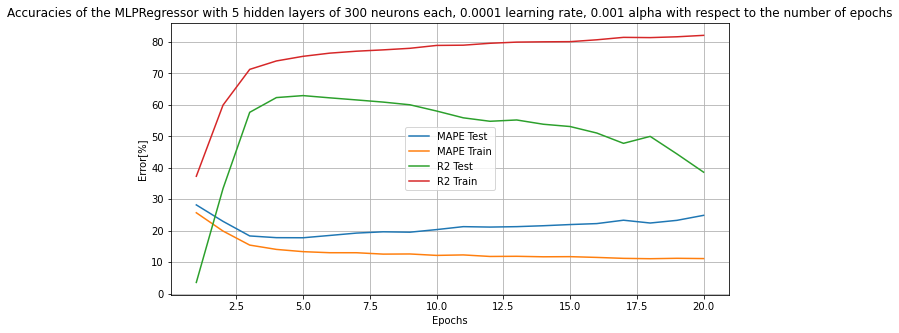

In [88]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(range(1, 21, 1), mape_test, label="MAPE Test")
plt.plot(range(1, 21, 1), mape_train, label="MAPE Train")
plt.plot(range(1, 21, 1), r2_test, label="R2 Test")
plt.plot(range(1, 21, 1), r2_train, label="R2 Train")
plt.xlabel("Epochs")
plt.ylabel("Error[%]")
plt.title(
    "Accuracies of the MLPRegressor with 5 hidden layers of 300 neurons each, 0.0001 learning rate, 0.001 alpha with respect to the number of epochs"
)
plt.grid(True)
plt.legend()
plt.show()


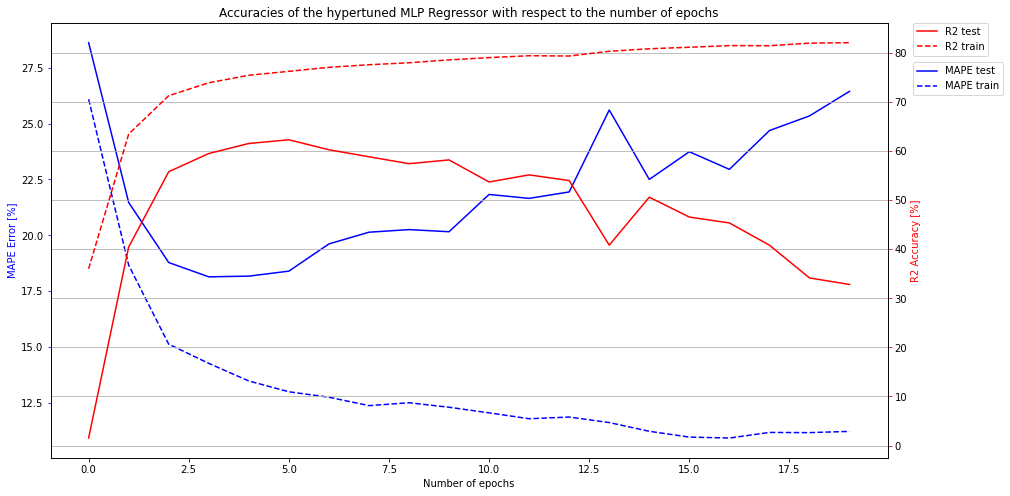

In [553]:
import matplotlib.pyplot as plt

# Increase the default figure size
plt.rcParams["figure.figsize"] = [15, 8]

# Create a figure and an axis for the first y-axis
fig, ax1 = plt.subplots()

# Plot the mape_test and mape_train data on the first y-axis
ax1.plot(mape_test, "b-", label="MAPE test")
ax1.plot(mape_train, "b--", label="MAPE train")

# Set the label and color for the first y-axis
ax1.set_ylabel("MAPE Error [%]", color="b")
ax1.tick_params(axis="y", color="b")

# put lgend outside the plot
plt.legend(bbox_to_anchor=(1.03, 0.91), loc=2, borderaxespad=0.0)


# Create a second axis for the second y-axis
ax2 = ax1.twinx()

# Plot the r2_test and r2_train data on the second y-axis
ax2.plot(r2_test, "r-", label="R2 test")
ax2.plot(r2_train, "r--", label="R2 train")

# Set the label and color for the second y-axis
ax2.set_ylabel("R2 Accuracy [%]", color="r")
ax2.tick_params(axis="y", color="r")

# put lgend outside the plot
plt.legend(bbox_to_anchor=(1.03, 1), loc=2, borderaxespad=0.0)

# Label the x-axis and add a title
plt.xlabel("Number of epochs")
plt.title(
    "Accuracies of the hypertuned MLP Regressor with respect to the number of epochs"
)
plt.grid(True)
ax1.set_xlabel("Number of epochs")

# Show the plot
plt.show()


## Final model

In [378]:
reg_all = MLPRegressor(
    hidden_layer_sizes=(300, 300, 300, 300, 300),
    activation="relu",
    solver="adam",
    alpha=0.0005,
    batch_size="auto",
    learning_rate="constant",
    learning_rate_init=0.0001,
    power_t=0.5,
    max_iter=6,
    shuffle=True,
    random_state=None,
    tol=0.0001,
    verbose=True,
    warm_start=False,
    momentum=0.9,
    nesterovs_momentum=True,
    early_stopping=False,
    validation_fraction=0.1,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
)
reg_all.fit(X_train_, y_train)


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 5886035723.42079067
Iteration 2, loss = 1006761028.04812551
Iteration 3, loss = 636932076.92126393
Iteration 4, loss = 540270051.73493075
Iteration 5, loss = 506455061.27520871
Iteration 6, loss = 487706874.17605776


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(alpha=0.0005, hidden_layer_sizes=(300, 300, 300, 300, 300),
             learning_rate_init=0.0001, max_iter=6, verbose=True)

In [379]:
y_pred = reg_all.predict(X_test_)


In [282]:
import joblib

joblib.dump(
    reg_all,
    "model_reg_all_300_300_300_500_steps_good_peaks_1132min_wrong_windows_6hr_12hr_1day_1week.joblib",
)


['model_reg_all_300_300_300_500_steps_good_peaks_1132min_wrong_windows_6hr_12hr_1day_1week.joblib']

In [380]:
y_test_ = y_test
y_pred_ = y_pred


In [381]:
# add a column with the date taken from X_test to y_test_ and make sure the date is in the right order
y_test_["Date"] = X_test["Date"]
# y_test_ = y_test_.sort_values(by=['Date'])
y_test_.head()
# add a column with the value predicted Y_pred_ to y_test_
y_test_["Value_pred"] = y_pred_
y_test_.head()


,Value,Date,Value_pred
222170,275735.874,2022-07-13 06:14:00,244896.177344
222171,302654.976,2022-07-13 06:15:00,245299.633776
222172,341823.360,2022-07-13 06:16:00,245277.923011
222173,347803.125,2022-07-13 06:17:00,246348.009314
222174,345774.519,2022-07-13 06:18:00,247546.534508


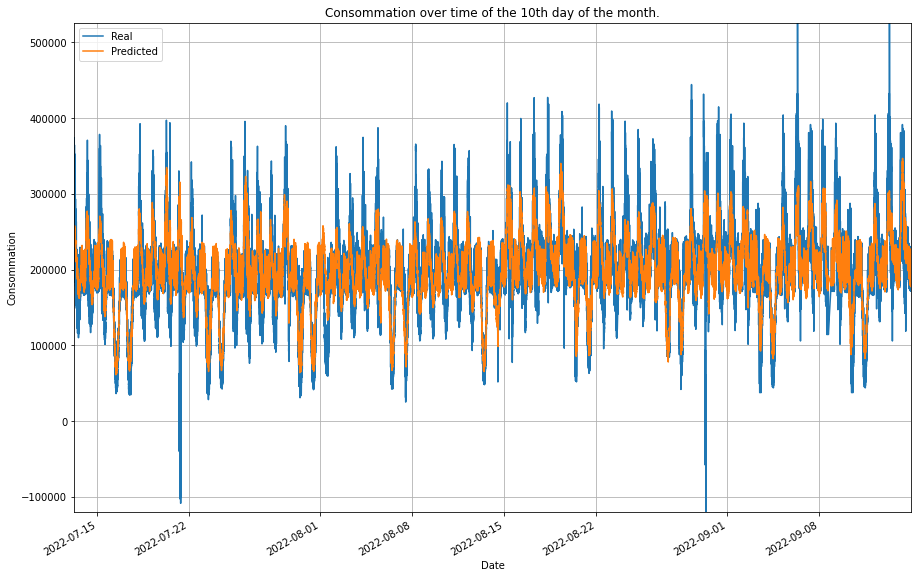

In [382]:
# plot the real value and the predicted value
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(y_test_["Date"], y_test_["Value"], label="Real Data")
ax.plot(y_test_["Date"], y_test_["Value_pred"], label="Predicted Data")
ax.set_title("Consumption over time ")
ax.set_xlabel("Date")
ax.set_ylabel("Consumption")
ax.set_xlim(y_test_["Date"].min(), y_test_["Date"].max())
ax.set_ylim(y_test_["Value"].min(), y_test_["Value"].max())
ax.grid(True)
ax.legend()
fig.autofmt_xdate()
plt.show()


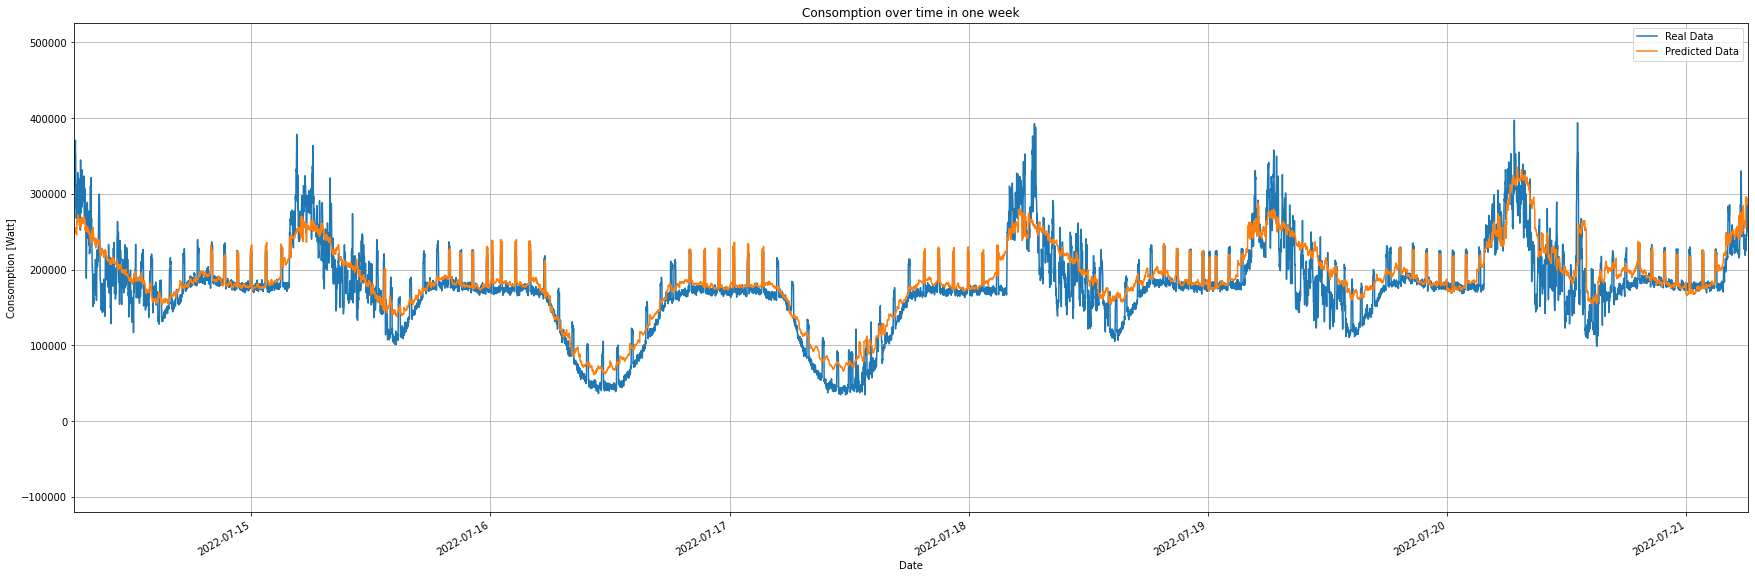

In [383]:
def plot_consumption_over_time_zoomed_graph():
    fig, ax = plt.subplots(figsize=(30, 10))

    ax.plot(y_test_["Date"], y_test_["Value"], label="Real Data")
    ax.plot(y_test_["Date"], y_test_["Value_pred"], label="Predicted Data")
    ax.set_title("Consomption over time in one week")
    ax.set_xlabel("Date")
    ax.set_ylabel("Consomption [Watt]")

    ax.set_xlim(
        y_test_["Date"].min() + pd.Timedelta(days=1),
        y_test_["Date"].min() + pd.Timedelta(days=8),
    )
    ax.set_ylim(y_test_["Value"].min(), y_test_["Value"].max())
    ax.grid(True)
    fig.autofmt_xdate()
    ax.legend()
    plt.show()


plot_consumption_over_time_zoomed_graph()


In [384]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

# Compute the MAE, MSE, MAPE and RMSE
mae = mean_absolute_error(y_test_.Value, y_test_.Value_pred)
mse = mean_squared_error(y_test_.Value, y_test_.Value_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test_.Value, y_test_.Value_pred)
mape = mape * 100

# Print the results
print("MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("MAPE:", round(mape, 2), "%")


MAE: 21887.73
MSE: 1154256258.69
RMSE: 33974.35
MAPE: 18.44 %


In [385]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_.Value, y_test_.Value_pred)

accuracy = r2 * 100

# Print the result
print("Accuracy:", round(accuracy, 2), "%")


Accuracy: 62.83 %


In [386]:
# y_test_6hrs = y_test_


In [387]:
y_test_24hrs = y_test_


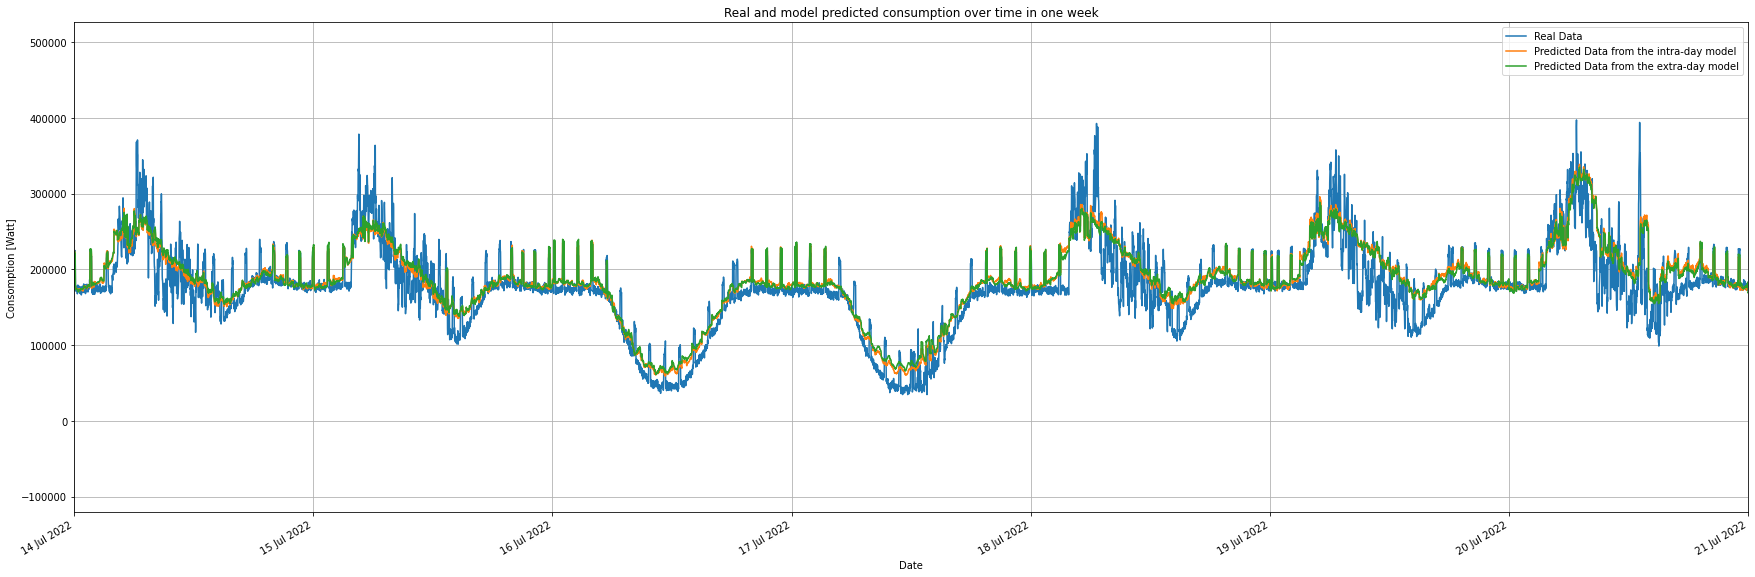

In [444]:
def plot_consumption_over_time_zoomed_graph():
    fig, ax = plt.subplots(figsize=(30, 10))

    ax.plot(y_test_6hrs["Date"], y_test_6hrs["Value"], label="Real Data")
    ax.plot(
        y_test_6hrs["Date"],
        y_test_6hrs["Value_pred"],
        label="Predicted Data from the intra-day model",
    )
    ax.plot(
        y_test_24hrs["Date"],
        y_test_24hrs["Value_pred"],
        label="Predicted Data from the extra-day model",
    )
    ax.set_title("Real and model predicted consumption over time in one week")
    ax.set_xlabel("Date")
    ax.set_ylabel("Consomption [Watt]")

    ax.set_xlim(
        y_test_6hrs["Date"].min() + pd.Timedelta(hours=17) + pd.Timedelta(minutes=46),
        y_test_6hrs["Date"].min()
        + pd.Timedelta(hours=17)
        + pd.Timedelta(minutes=46)
        + pd.Timedelta(days=7),
    )
    ax.set_ylim(y_test_6hrs["Value"].min(), y_test_6hrs["Value"].max())
    ax.grid(True)
    fig.autofmt_xdate()
    formatter = mdates.DateFormatter("%d %b %Y")
    ax.xaxis.set_major_formatter(formatter)
    ax.legend()
    plt.show()


plot_consumption_over_time_zoomed_graph()


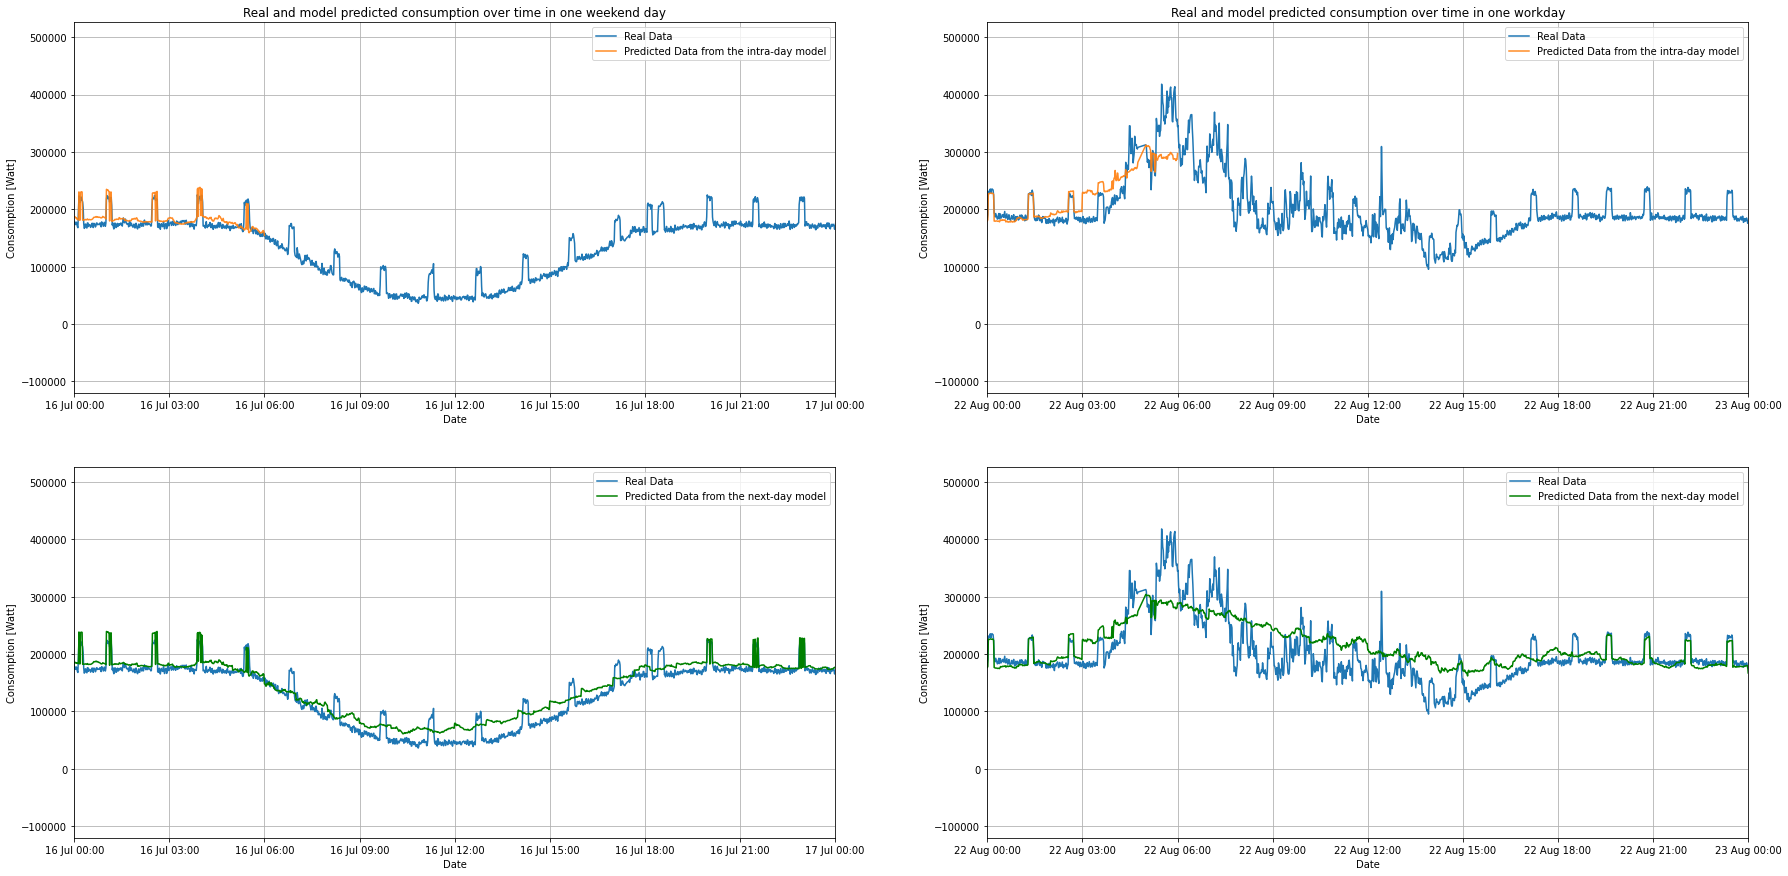

In [555]:
import matplotlib.dates as mdates


def plot_consumption_over_time_zoomed_graph():
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(30, 15))
    ax1.plot(y_test_6hrs["Date"], y_test_6hrs["Value"], label="Real Data")
    y_6hrs = y_test_6hrs.loc[
        (
            y_test_6hrs["Date"]
            >= y_test_6hrs["Date"].min()
            + pd.Timedelta(hours=17)
            + pd.Timedelta(minutes=46)
            + pd.Timedelta(days=2)
        )
        & (
            y_test_6hrs["Date"]
            <= y_test_6hrs["Date"].min()
            + pd.Timedelta(hours=23)
            + pd.Timedelta(minutes=46)
            + pd.Timedelta(days=2)
        )
    ]
    ax1.plot(
        y_6hrs["Date"],
        y_6hrs["Value_pred"],
        label="Predicted Data from the intra-day model",
        alpha=0.9,
    )
    ax1.set_title("Real and model predicted consumption over time in one weekend day")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Consomption [Watt]")
    ax1.set_xlim(
        y_test_6hrs["Date"].min()
        + pd.Timedelta(hours=17)
        + pd.Timedelta(minutes=46)
        + pd.Timedelta(days=2),
        y_test_6hrs["Date"].min()
        + pd.Timedelta(hours=17)
        + pd.Timedelta(minutes=46)
        + pd.Timedelta(days=3),
    )
    ax1.set_ylim(y_test_6hrs["Value"].min(), y_test_6hrs["Value"].max())
    ax1.grid(True)
    formatter = mdates.DateFormatter("%d %b %H:%M")
    ax1.xaxis.set_major_formatter(formatter)
    ax1.legend()

    ax2.plot(y_test_6hrs["Date"], y_test_6hrs["Value"], label="Real Data")
    y_6hrs = y_test_6hrs.loc[
        (
            y_test_6hrs["Date"]
            >= y_test_6hrs["Date"].min()
            + pd.Timedelta(hours=17)
            + pd.Timedelta(minutes=46)
            + pd.Timedelta(days=39)
        )
        & (
            y_test_6hrs["Date"]
            <= y_test_6hrs["Date"].min()
            + pd.Timedelta(hours=23)
            + pd.Timedelta(minutes=46)
            + pd.Timedelta(days=39)
        )
    ]
    ax2.plot(
        y_6hrs["Date"],
        y_6hrs["Value_pred"],
        label="Predicted Data from the intra-day model",
        alpha=0.9,
    )
    ax2.set_title("Real and model predicted consumption over time in one workday")
    ax2.set_xlabel("Date")
    ax2.set_ylabel("Consomption [Watt]")
    ax2.set_xlim(
        y_test_6hrs["Date"].min()
        + pd.Timedelta(hours=17)
        + pd.Timedelta(minutes=46)
        + pd.Timedelta(days=39),
        y_test_6hrs["Date"].min()
        + pd.Timedelta(hours=17)
        + pd.Timedelta(minutes=46)
        + pd.Timedelta(days=40),
    )
    ax2.set_ylim(y_test_6hrs["Value"].min(), y_test_6hrs["Value"].max())
    ax2.grid(True)
    formatter = mdates.DateFormatter("%d %b %H:%M")
    ax2.xaxis.set_major_formatter(formatter)
    ax2.legend()

    ax3.plot(y_test_6hrs["Date"], y_test_6hrs["Value"], label="Real Data")
    ax3.plot(
        y_test_24hrs["Date"],
        y_test_24hrs["Value_pred"],
        label="Predicted Data from the next-day model",
        color="g",
    )
    ax3.set_xlabel("Date")
    ax3.set_ylabel("Consomption [Watt]")
    ax3.set_xlim(
        y_test_6hrs["Date"].min()
        + pd.Timedelta(hours=17)
        + pd.Timedelta(minutes=46)
        + pd.Timedelta(days=2),
        y_test_6hrs["Date"].min()
        + pd.Timedelta(hours=17)
        + pd.Timedelta(minutes=46)
        + pd.Timedelta(days=3),
    )
    ax3.set_ylim(y_test_6hrs["Value"].min(), y_test_6hrs["Value"].max())
    ax3.grid(True)
    formatter = mdates.DateFormatter("%d %b %H:%M")
    ax3.xaxis.set_major_formatter(formatter)
    ax3.legend()

    ax4.plot(y_test_6hrs["Date"], y_test_6hrs["Value"], label="Real Data")
    ax4.plot(
        y_test_24hrs["Date"],
        y_test_24hrs["Value_pred"],
        label="Predicted Data from the next-day model",
        color="g",
    )
    ax4.set_xlabel("Date")
    ax4.set_ylabel("Consomption [Watt]")
    ax4.set_xlim(
        y_test_6hrs["Date"].min()
        + pd.Timedelta(hours=17)
        + pd.Timedelta(minutes=46)
        + pd.Timedelta(days=39),
        y_test_6hrs["Date"].min()
        + pd.Timedelta(hours=17)
        + pd.Timedelta(minutes=46)
        + pd.Timedelta(days=40),
    )
    ax4.set_ylim(y_test_6hrs["Value"].min(), y_test_6hrs["Value"].max())
    ax4.grid(True)
    formatter = mdates.DateFormatter("%d %b %H:%M")
    ax4.xaxis.set_major_formatter(formatter)
    ax4.legend()

    plt.show()


plot_consumption_over_time_zoomed_graph()
